**Grupo 1:**
<br>Juana Mejía 
<br>Daniela Espinosa
<br>Pablo Ortega

## Inteligencia de negocios
### Laboratorio 2 - Agrupación

In [166]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.cluster import AgglomerativeClustering # type: ignore
from sklearn.metrics import silhouette_score, davies_bouldin_score # type: ignore
from scipy.cluster.hierarchy import dendrogram, linkage # type: ignore
from sklearn.decomposition import PCA # type: ignore
import plotly.express as px # type: ignore
import seaborn as sns # type: ignore

Carga de datos

In [167]:
df = pd.read_csv('202420_Laboratorio 2 - Agrupación_202420_Laboratorio_2_-_Agrupación_data.csv')

In [168]:
df.shape

(1000, 23)

#### Descripción General de los Datos
Este conjunto de datos médicos contiene información sobre 1000 pacientes con 23 características tanto clínicas como demográficas, con el fin de estimar el tiempo aproximado de hospitalización de un paciente. A continuación, se describen las características de las variables, el perfil de los datos y el análisis de calidad de datos.

In [169]:
pd.set_option('display.max_columns', None)
df.head()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,90.0,92.0,20.0,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,80.0,76.0,20.0,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,60.0,84.0,20.0,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,70.0,76.0,20.0,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,70.0,130.0,20.0,38.1,NaN,4,Fever,1,2,1,267,"3,60",2


#### Estadísticas descriptivas

In [170]:
pd.set_option('display.max_columns', None)
df.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


Las estadísticas descriptivas nos permiten observar varias cosas:

1. **Count** -> Existen valores faltantes en las columnas SBP, DBP, HR, RR, BT, Saturación.
2. **Mean y std** -> Nos permiten tener una primera imagen mental de cómo se distribuyen los datos.
3. **Mean, std, min, max** -> Es evidente que la variable objetivo está extremadamente dispersa y muy posiblemente tiene casos atípicos.

Es importante recalcar que en la tabla se presentan varias estadísticas de las variables categóricas codificadas; sin embargo, muchas de estas, como el promedio y la desviación estándar, no tienen sentido y, por lo tanto, no sirven para sacar conclusiones.

A continuación se observan histogramas de las distribuciones de cada característica.

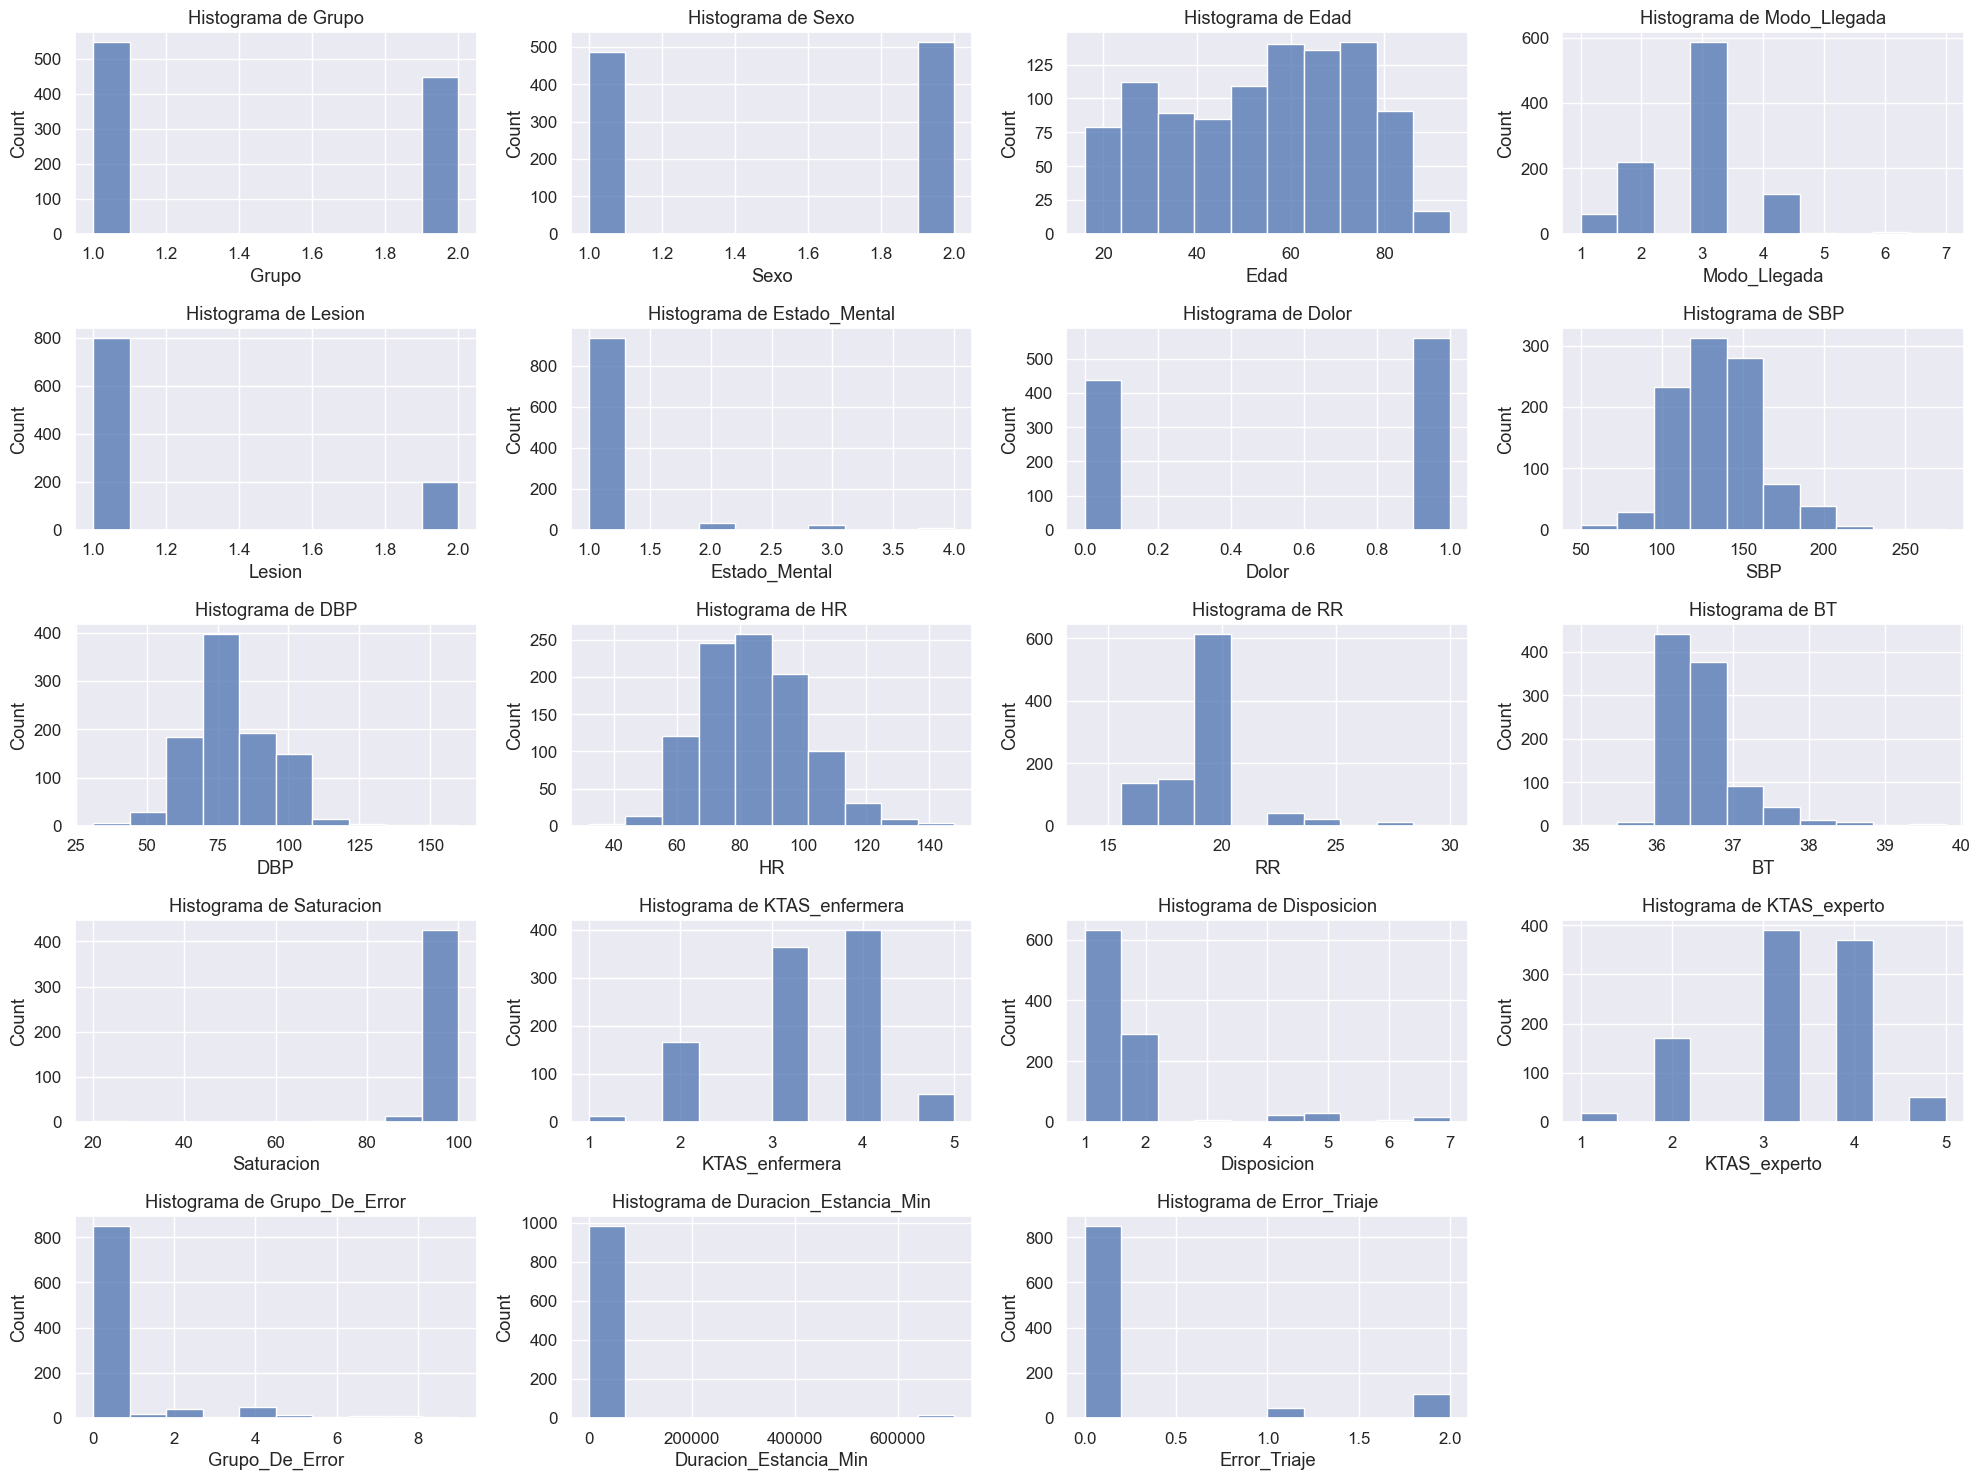

In [171]:

# Lista de características
features = ['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 
            'Dolor', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'Saturacion', 
            'KTAS_enfermera', 'Disposicion', 'KTAS_experto', 
            'Grupo_De_Error', 'Duracion_Estancia_Min', 'Error_Triaje']

plt.figure(figsize=(20, 15)) 

for i, feature in enumerate(features):
    plt.subplot(5, 4, i+1)  # Crear subplots en una cuadrícula de 5 filas y 4 columnas
    sns.histplot(data=df, x=feature, kde=False, bins=10)  # Crear histograma
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


#### Niveles de variables categóricas

In [172]:
categoricas=['Grupo','Sexo','Modo_Llegada',"Lesion",'Queja_Principal','Estado_Mental','Dolor','dolor_NRS','KTAS_enfermera','Diagnostico_En_Urgencias','Disposicion','KTAS_experto','Grupo_De_Error','Error_Triaje']
data_categorica=df[categoricas]

levels = data_categorica.apply(pd.Series.unique)
num_levels = data_categorica.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Grupo                                                                  [2, 1]
Sexo                                                                   [2, 1]
Modo_Llegada                                            [2, 4, 3, 1, 6, 5, 7]
Lesion                                                                 [1, 2]
Queja_Principal             [ant. chest pain, headache, fever & chill, dys...
Estado_Mental                                                    [1, 4, 2, 3]
Dolor                                                                  [1, 0]
dolor_NRS                              [2, 4, 3, #BOÞ!, 6, 5, 7, 8, 1, 9, 10]
KTAS_enfermera                                                [2, 3, 4, 1, 5]
Diagnostico_En_Urgencias    [Ischaemic chest pain, Subarachnoid haemorrhag...
Disposicion                                             [2, 7, 1, 5, 6, 3, 4]
KTAS_experto                                                  [2, 3, 4, 1, 5]
Grupo_De_Error                                 [0, 4, 1, 2, 6, 7

Debido a que el método `describe()` no nos proporciona información útil sobre las variables categóricas, investigaremos los niveles y el número de niveles por variable categórica. Esto nos permitirá comparar la información con el diccionario de datos y tomar decisiones informadas para la limpieza de datos y la selección de variables. Es posible observar las siguientes cosas:

1. **Modo_Llegada**: El diccionario de datos tiene codificación de 1 a 5, pero los datos tienen niveles de 1 a 7.
2. **Dolor**: Está codificado como 0 o 1 en el diccionario de datos; sin embargo, en el dataset existen las categorías 1 y 2.
3. **dolor_NRS**: Tiene un error de formato, "#BOÞ!".
4. **Error_Triaje**: No es binaria, por lo que es necesario preguntar su significado.
5. **Queja_principal y Diagnostico_En_Urgencias**: No se pueden tratar como variables categóricas debido a que tienen demasiados niveles.

#### Análisis de las observaciones:

Como determinamos que dolor_NRS tenía un error de formato, necesitamos saber a cuántas filas afecta este error para decidir cómo proceder. Es posible observar que existen demasiadas instancias del error como para eliminar las filas entonces debemos considerar eliminar la columna o imputar el error.

In [173]:
df['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    440
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
9          1
Name: count, dtype: int64

El número de errores es bastante alto, pero como también se tiene la columna Dolor, podemos usarla para analizar el significado y la posible intención del recopilador de datos. 

In [174]:
d_dolor = df[df['Dolor']==0]
d_dolor['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    438
Name: count, dtype: int64

Observamos que de las 440 instancias con el error, 438 ocurren cuando el paciente no reporta dolor. Por lo tanto, asumimos que el error se produce cuando el paciente no tiene dolor y no se le asigna un valor de dolor_NRS.

Revisamos los niveles del modo llegada debido a que existen dos niveles que no están explicado en el diccionario de datos.

In [175]:
df['Modo_Llegada'].value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
6      7
5      2
7      1
Name: count, dtype: int64

Hay solo 8 instancias con valores de 6 y 7 (que no están especificaods en el diccionario), por lo que podemos asumir que estos datos se pueden incluir en el Modo_Llegada 5.

Revisión de valores faltantes para cada una de las columnas:

In [176]:
# Número de faltantes por columna
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Grupo                         0
Sexo                          0
Edad                          0
Modo_Llegada                  0
Lesion                        0
Queja_Principal               0
Estado_Mental                 0
Dolor                         0
dolor_NRS                     0
SBP                          17
DBP                          21
HR                           12
RR                           15
BT                           11
Saturacion                  556
KTAS_enfermera                0
Diagnostico_En_Urgencias      1
Disposicion                   0
KTAS_experto                  0
Grupo_De_Error                0
Duracion_Estancia_Min         0
Duracion_KTAS_Min             0
Error_Triaje                  0
dtype: int64


Las columnas SBP, DBP, HR, RR y BT tienen faltantes.

**Análisis de la variable objetivo:**

Revisión de como se distribuye la variable objetivo. Recordando que existian valores extremos.

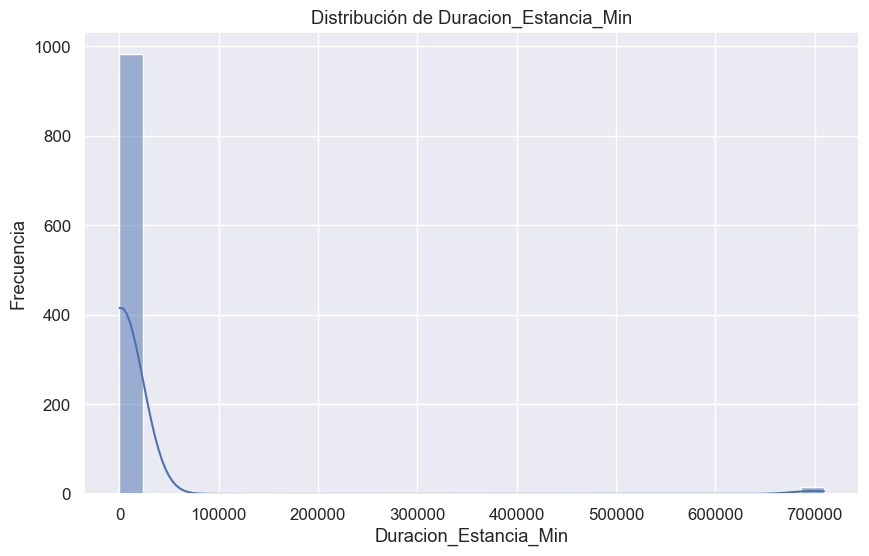

In [177]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

In [178]:
df[df["Duracion_Estancia_Min"] >= 10000]["Duracion_Estancia_Min"].count()

57

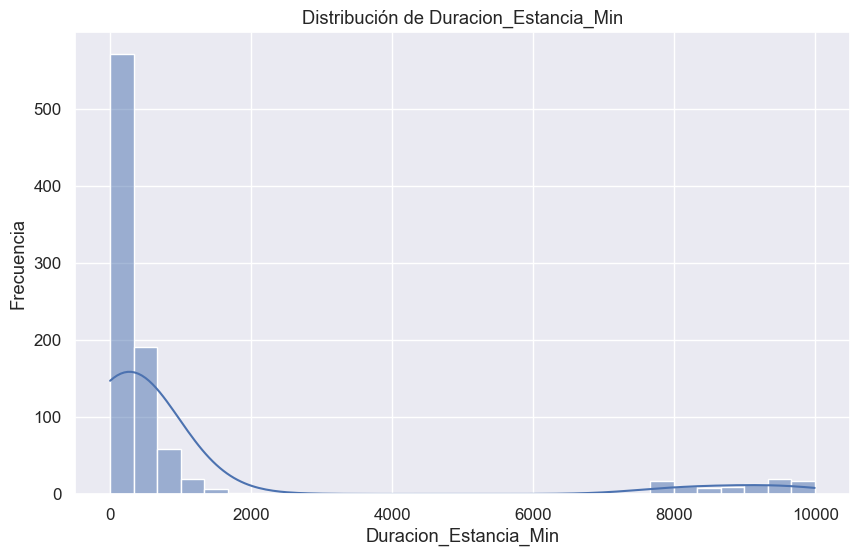

In [179]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[(df["Duracion_Estancia_Min"] >= 0) & (df["Duracion_Estancia_Min"] <= 10000)]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

In [180]:
df[df["Duracion_Estancia_Min"] >= 2100]["Duracion_Estancia_Min"].count()

151

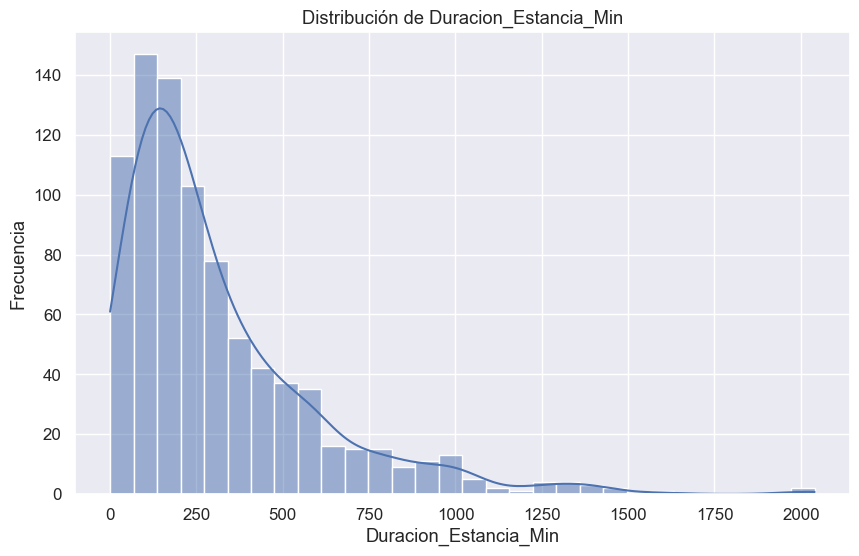

In [181]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[df["Duracion_Estancia_Min"] <= 5000]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()

En las graficas se puede observar que existen valores atípicos que pueden afectar el ajuste del modelo.

### Análisis de Calidad de Datos

##### Valores Faltantes
- **Saturacion**, **BT (Temperatura Corporal)**, **dolor_NRS**, **SBP**, **DBP**, **HR**, **RR**: Tienen valores faltantes.

##### Distribución de Datos
- **Duracion_Estancia_Min**: Muestra alta variabilidad, con algunos valores extremadamente altos que podrían ser atípicos.

##### Valores Atípicos
- **Duracion_Estancia_Min**: Presenta valores extremos que pueden ser errores o casos excepcionales.

##### Consistencia de Datos
- **dolor_NRS**: Muestra un rango amplio (1 a 10) pero con una media baja, lo cual es consistente con el reporte de dolor.


### Limpieza de datos

In [182]:
# Se copia el df para no alterar los datos originales.
data = df.copy()

Se debe convertir la variable Duracion_KTAS_Min a float para que se pueda utilizar en el modelo:

In [183]:
# Conversión de String a float 
data['Duracion_KTAS_Min'] = data['Duracion_KTAS_Min'].str.replace(',', '.').astype(float)
data['Duracion_KTAS_Min'].describe()

count    1000.000000
mean        5.529710
std         3.439131
min         1.000000
25%         3.000000
50%         4.630000
75%         7.020000
max        17.370000
Name: Duracion_KTAS_Min, dtype: float64

Queja_Principal y Diagnostico_En_Urgencias son columnas de texto y no las usaremos en el primer modelo, después exploraremos el procesamiento de texto. \
Por otro lado, la saturación tiene casi la mitad de valores faltantes y por esto decidimos no utilizarla.

In [184]:
# Se quitan las columnas por la cantidad tan alta de categorías
data=data.drop(columns=['Queja_Principal','Diagnostico_En_Urgencias','Saturacion'])

Imputamos el #BOÞ! con 1 para poder usar la columna en el modelo. Esto con base en lo explorado anteriormente.

In [185]:
# Dolor BOP
data['dolor_NRS'] = pd.to_numeric(data['dolor_NRS'].replace('#BOÞ!', 1))

Cambiamos los niveles 6 y 7 de Modo_Llegada a 5 para tener la misma logica del diccionario de datos.

In [186]:
# Modo_Llegada
data['Modo_Llegada'] = data['Modo_Llegada'].replace(6, 5)
data['Modo_Llegada'] = data['Modo_Llegada'].replace(7, 5)
data['Modo_Llegada'].value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
5     10
Name: count, dtype: int64

#### Imputación de las filas con valores NaN:

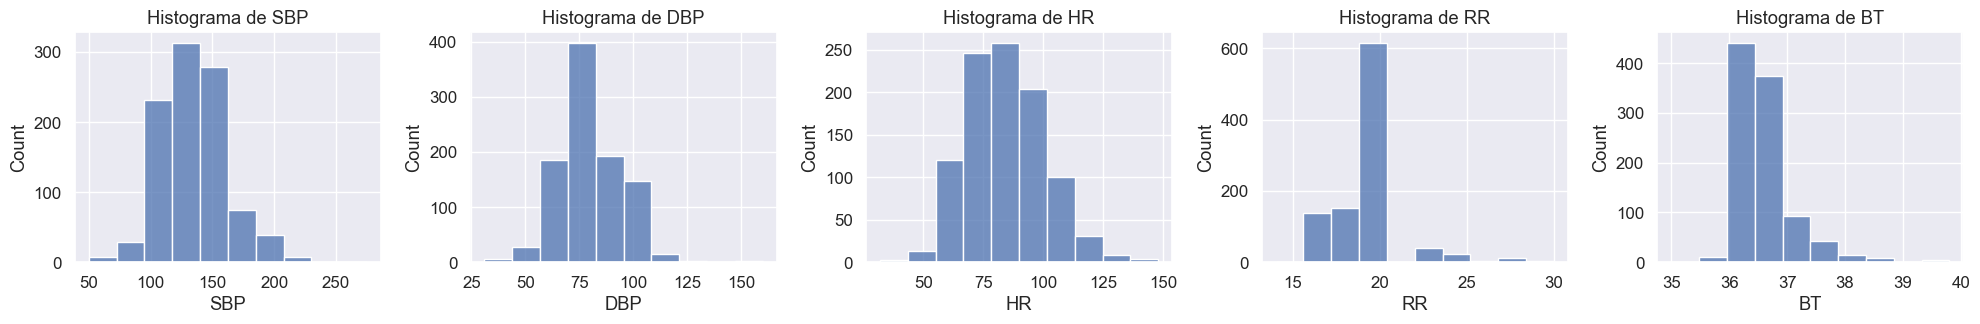

In [187]:
# Lista de características
features = ['SBP', 'DBP', 'HR', 'RR', 'BT']

plt.figure(figsize=(20, 15)) 

for i, feature in enumerate(features):
    plt.subplot(5, 5, i+1)  # Crear subplots en una cuadrícula de 5 filas y 5 columnas
    sns.histplot(data=df, x=feature, kde=False, bins=10)
    plt.title(f'Histograma de {feature}')
    plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [188]:
columnas_imputar = ['SBP', 'DBP', 'HR', 'RR', 'BT']
for columna in columnas_imputar:
    print(columna)
    print(f'Media: {data[columna].mean()}')
    print(f'Mediana: {data[columna].median()}')
    print(f'Moda: {data[columna].mode()[0]}')

SBP
Media: 133.4852492370295
Mediana: 130.0
Moda: 120.0
DBP
Media: 79.56690500510726
Mediana: 80.0
Moda: 80.0
HR
Media: 84.40080971659918
Mediana: 82.0
Moda: 80.0
RR
Media: 19.450761421319797
Mediana: 20.0
Moda: 20.0
BT
Media: 36.56299292214358
Mediana: 36.5
Moda: 36.0


A partir del comportamiento de las características y teniendo en cuenta que estas tienen valores enteros, la medida más precisa para imputar sería la moda, ya que representa el valor que aparece con mayor frecuencia y es más adecuado para este tipo de datos. La media generaría valores decimales que no son acordes a los valores originales, y la mediana también cuando el número de datos es par. 

In [189]:
# Imputar valores NaN con la media de cada columna
for columna in columnas_imputar:
    data[columna] = data[columna].fillna(data[columna].mode()[0])

Decidimos quitar los valores atípicos para mejorar el rendimiento del modelo en los casos mas comunes. Sin embargo, esto significa que el modelo no se funcionará muy bien para valores extremos.

In [190]:
# Eliminar las filas donde Duracion_Estancia_Min > 2100
data = data[data["Duracion_Estancia_Min"] <= 2100]
data["Duracion_Estancia_Min"].describe()

count     849.000000
mean      308.449941
std       285.380122
min         0.000000
25%       118.000000
50%       216.000000
75%       411.000000
max      2040.000000
Name: Duracion_Estancia_Min, dtype: float64

### Selección de Variables para el Modelado

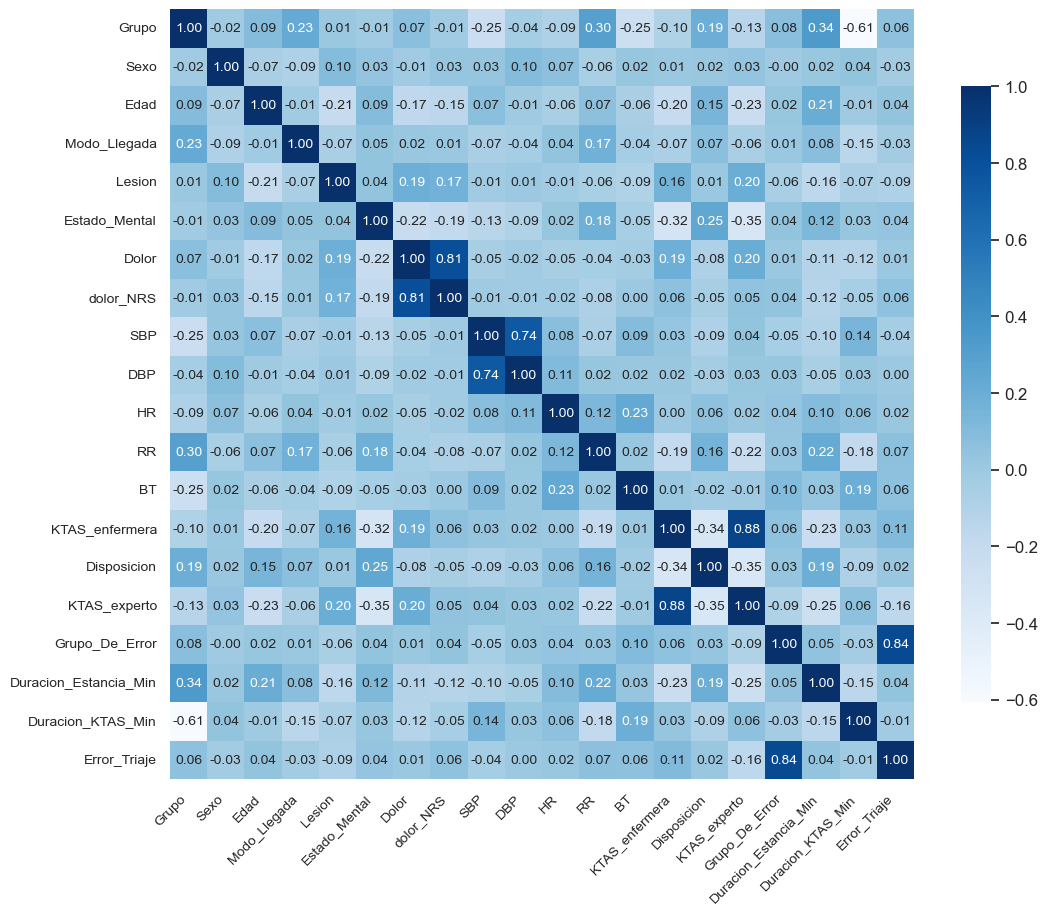

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'KTAS_enfermera',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')


In [191]:

# Calculate the correlation matrix
corr = data.corr(numeric_only= True)

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt=".2f", 
           cbar_kws={"shrink": 0.8})

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.show()

print(data.columns)

En la matriz de correlación es posible identificar variables correlacionadas que podrían ser eliminadas ya que una explica a la otra. Las principales son:
- Dolor con Dolor_NRS
- SBP con DBP
- KTAS_enfermera con KTAS_experto
- Grupo_De_Error con Error_Triaje

<Axes: >

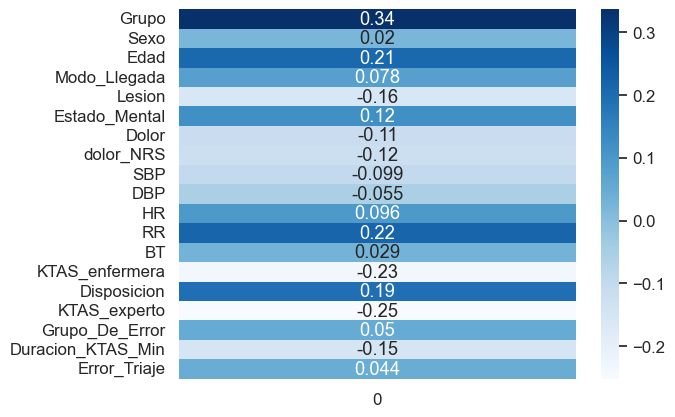

In [192]:
corrw = data.drop(['Duracion_Estancia_Min'], axis=1).corrwith(data['Duracion_Estancia_Min'], numeric_only= True)
sns.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

Según lo observado en la matriz de correlación con la variable objetivo decidimos eliminar las columnas DBP, KTAS_enfermera y Error_Triaje, ya que tienen una menor correlación con la Duracion_Estancia_Min que SBP, KTAS_experto y Grupo_De_Error respectivamente. Además eliminamos dolor_NRS ya que tiene una alta correlación con dolor y dolor está completa y tiene mayor correlación con la variable objetivo.

In [193]:
data=data.drop(columns=['DBP', 'KTAS_enfermera', 'Error_Triaje', 'dolor_NRS', 'Grupo_De_Error'])
data.columns

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'SBP', 'HR', 'RR', 'BT', 'Disposicion', 'KTAS_experto',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min'],
      dtype='object')

Ajustar los valores de las variables categóricas binarias que tienen valores 1 y 2, para que todas queden unificadas con valores 0 y 1:

In [194]:
data['Grupo'] = data['Grupo'].replace({1: 0, 2: 1})
data['Sexo'] = data['Sexo'].replace({1: 0, 2: 1})
data['Lesion'] = data['Lesion'].replace({1: 0, 2: 1})

One hot encoding para las variables categóricas con más de 2 categorías:

In [195]:
columns_to_encode = ['Disposicion', 'Modo_Llegada', 'Estado_Mental']

# Aplicamos one hot encoding
X = pd.get_dummies(data, columns=columns_to_encode, drop_first=True, dtype=int)

# Visualizamos el DataFrame resultante
X.head()

,Grupo,Sexo,Edad,Lesion,Dolor,SBP,HR,RR,BT,KTAS_experto,Duracion_Estancia_Min,Duracion_KTAS_Min,Disposicion_2,Disposicion_3,Disposicion_4,Disposicion_5,Disposicion_6,Disposicion_7,Modo_Llegada_2,Modo_Llegada_3,Modo_Llegada_4,Modo_Llegada_5,Estado_Mental_2,Estado_Mental_3,Estado_Mental_4
0,1,1,49,0,1,150.0,92.0,20.0,36.2,2,1591,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,1,30,0,1,140.0,76.0,20.0,36.3,3,211,3.0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,0,61,1,1,100.0,84.0,20.0,36.4,4,119,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,61,0,1,120.0,76.0,20.0,36.5,3,414,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,67,0,0,143.0,130.0,20.0,38.1,2,267,3.6,0,0,0,0,0,0,0,1,0,0,0,0,0


Esto se hace para convertir las variables categóricas 'Disposicion', 'Modo_Llegada', 'Estado_Mental' a múltiples columnas binarias (0 y 1) que representan si la instancia pertenece o no a esa categoría en específico. Esto es útil porque la mayoría de los algoritmos de clustering basados en distancias, y crear estas nuevas columnas de categorías binarias evita atribuir relaciones numéricas a categorías que no las tienen.

Esto no se hace para la columna KTAS_expero ya que esta característica sí tiene categorías con relaciones numéricas (entre más alta, más grave la emergencia)

## Implementación de modelos

### Agglomerative Clustering
Implementado por: Daniela Espinosa

#### PCA (Principal Component Analysis):

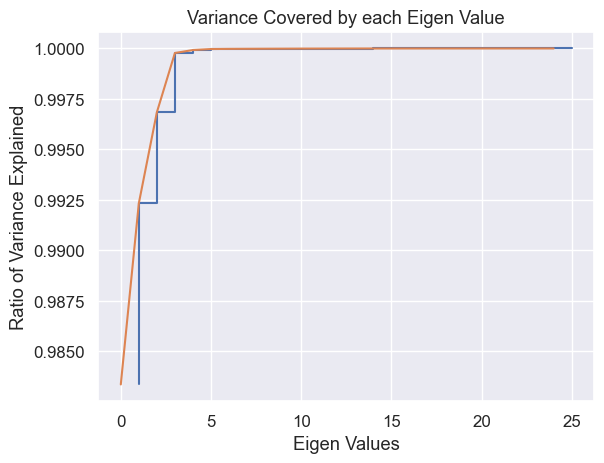

In [196]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(X))

pca.explained_variance_
max = len(pca.explained_variance_) + 1

plt.step(list(range(1,max)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

Se realiza PCA para reducir la dimensionalidad de los datos. Este gráfico de varianza permite decidir cuántos componentes principales se deberían conservar. En este caso, con 3 componentes se explica practicamente el 100% de la varianza, por lo que se reduce la dimensionalidad a 3.

In [197]:
pca = PCA(n_components = 3) 
X_pca = pca.fit_transform(X) 
X_pca = pd.DataFrame(X_pca) 
X_pca.columns = ['P1', 'P2', 'P3'] 

Anotación: Se decidió no normalizar los datos ya que esto hace que se pierda drásticamente la capacidad de explicar la varianza. A continuación se muestra el mismo gráfico con los datos normalizados:

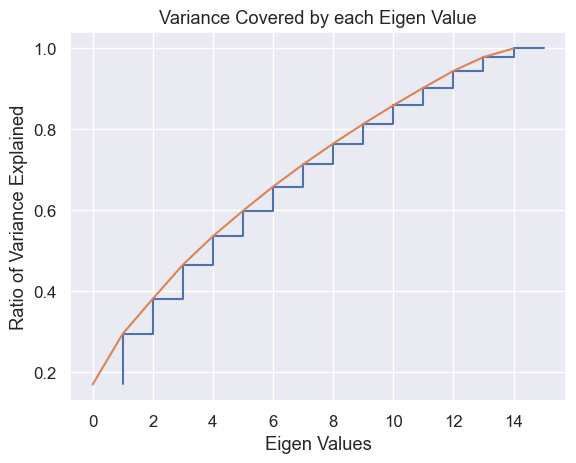

In [198]:
X2 = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(X_scaled))

pca.explained_variance_
max = len(pca.explained_variance_) + 1

plt.step(list(range(1,max)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

Por este motivo, se seguirán utilizando los datos ORIGINALES.

#### Construcción del Dendograma:

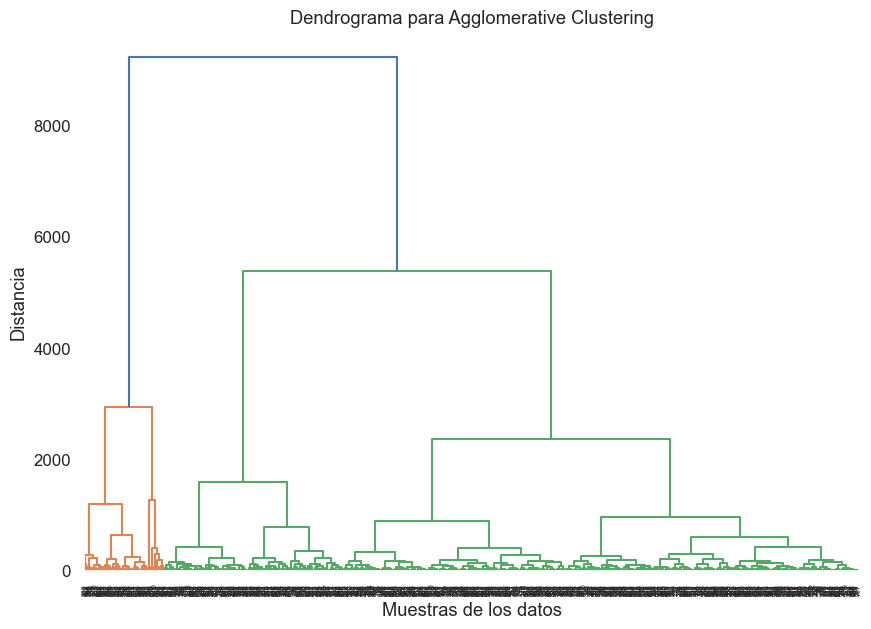

In [199]:
linked = linkage(X_pca, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma para Agglomerative Clustering')

plt.xlabel('Muestras de los datos')
plt.ylabel('Distancia')
plt.show()

A partir del Dendograma, parecería que el número óptimo de clusters sería 2 o 3. Este número se determina trazando líneas horizontales imaginarias entre cada dos bifurcaciones del árbol. Se elige la línea horizontal que maximice la suma del largo de las ramas verticales que la intersecan, y ese sería el número de clusters que puede ser el indicado.

Sin embargo, en la práctica no siempre es la herramienta más precisa o definitiva para tomar esa decisión, ya que está basado en la idea de agrupamiento jerárquico, lo que puede no ser adecuado para todos los tipos de datos. Por lo que se probarán diferentes configuraciones.

#### Modelo con linkage = 'single', 3 clusters

In [200]:
ac_s = AgglomerativeClustering(n_clusters = 3, linkage = 'single') 
labels_s = ac_s.fit_predict(X_pca)

# Visualización en 3D con plotly
fig = px.scatter_3d(
    X_pca, x='P1', y='P2', z='P3', 
    color=labels_s, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_pca, labels_s)
davies_bouldin = davies_bouldin_score(X_pca, labels_s)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')


Silhouette Score: 0.7352489244988863
Davies-Bouldin Score: 0.15325980256486502


El Silhouette Score mide qué tan similares son los objetos dentro del mismo cluster en comparación con objetos en otros clusters. Un valor cercano a 1 indica que los objetos están bien agrupados, mientras que un valor cercano a -1 indica que los objetos están mal agrupados. 

El Davies-Bouldin Score mide la relación entre la dispersión dentro de los clústeres y la distancia entre ellos. Valores más bajos, es decir más cercanos a 0, son mejores. 

A pesar de que este modelo tiene buenas métricas, se puede observar que el linkage 'single' no agrupa adecuadamente los datos, ya que hay un cluster muy grande y los demás muy pequeños. Esto es porque maximiza la distancia entre diferentes clusters, pero esto hace que haga un cluster por cada dato o pocos datos más lejanos.

#### Modelo con linkage = 'average', 3 clusters

In [201]:
ac_av = AgglomerativeClustering(n_clusters = 3, linkage = 'average') 
labels_av = ac_av.fit_predict(X_pca)

# Visualización en 3D con plotly
fig = px.scatter_3d(
    X_pca, x='P1', y='P2', z='P3', 
    color=labels_av, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_pca, labels_av)
davies_bouldin = davies_bouldin_score(X_pca, labels_av)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.6789909820083702
Davies-Bouldin Score: 0.36481975713538367


Aunque tiene métricas ligerante peores que las del modelo anterior, con linkage 'average' se aprecia una mejor separación de los clusters: 2 principales y uno muy pequeño que parece ser un outlier.

#### Modelo con linkage = 'ward', 3 clusters

In [202]:
ac_w = AgglomerativeClustering(n_clusters = 3, linkage='ward') 
labels_w = ac_w.fit_predict(X_pca)

# Visualización en 3D 
fig = px.scatter_3d(
    X_pca, x='P1', y='P2', z='P3', 
    color=labels_w, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_pca, labels_w)
davies_bouldin = davies_bouldin_score(X_pca, labels_w)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.5738203114542588
Davies-Bouldin Score: 0.5756136263568764


Con linkage 'ward' se ve una división en tres grandes clusters. Sin embargo, las métricas son peores que las del modelo anterior, ya que Silhouette Score es más bajo y el Davies-Bouldin Score es más alto.

#### Modelo con linkage = 'ward', 2 clusters

In [203]:
ac2_w = AgglomerativeClustering(n_clusters = 2, linkage='ward') 
labels2_w = ac2_w.fit_predict(X_pca)

# Visualización en 3D 
fig = px.scatter_3d(
    X_pca, x='P1', y='P2', z='P3', 
    color=labels2_w, 
    title='Agglomerative Clustering (3D PCA Visualización)',
    labels={'P1': 'Principal Component 1', 'P2': 'Principal Component 2', 'P3': 'Principal Component 3'},
    color_continuous_scale='Viridis'
)
fig.show()

# Evaluación del Modelo
sil_score = silhouette_score(X_pca, labels2_w)
davies_bouldin = davies_bouldin_score(X_pca, labels2_w)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.690888724679946
Davies-Bouldin Score: 0.46824966125608297


Con linkage 'ward' y 2 clusters hace un buen trabajo de agrupación y muestra el mejor Silhouette Score de todos los modelos, y un buen Davies-Bouldin Score, aunque no el mejor.

Se elige este modelo ya que tiene un buen balance de las métricas.

In [204]:
final_model = AgglomerativeClustering(n_clusters = 2, linkage='ward') 
labels_ac = final_model.fit_predict(X_pca)

El numero de clientes por cluster es:


{0: 762, 1: 87}

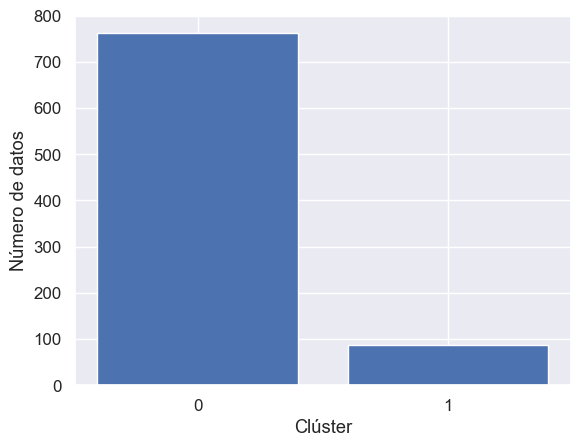

In [205]:
indexes, values = np.unique(labels_ac, return_counts=True)
rects = plt.bar(indexes, values)
plt.xlabel('Clúster')
plt.ylabel('Número de datos')
plt.xticks(indexes)
print('El numero de clientes por cluster es:')
{indexes[i]: values[i] for i in range(len(indexes))}

Se puede ver que el cluster 0 tiene la mayoría de los pacientes.

### Interpretabilidad de los clusters

Reversión del One hot encoding para tener una mejor visualización de los datos:

In [206]:
data_og = X.copy()

# Variables categóricas (ya codificadas) que necesitan ser revertidas
original_columns = ['Disposicion', 'Modo_Llegada', 'Estado_Mental']

for col in original_columns:
    # Filtrar las columnas que pertenecen a cada variable original 
    one_hot_cols = [c for c in data_og.columns if c.startswith(col + '_')]
    
    # Crear una columna que retome el valor de la categoría original
    data_og[col] = data_og[one_hot_cols].apply(lambda row: int(row.idxmax().split('_')[-1]) if row.max() == 1 else 1, axis=1)
    
    # Eliminar las columnas one-hot codificadas
    data_og.drop(one_hot_cols, axis=1, inplace=True)

data_og.head()

,Grupo,Sexo,Edad,Lesion,Dolor,SBP,HR,RR,BT,KTAS_experto,Duracion_Estancia_Min,Duracion_KTAS_Min,Disposicion,Modo_Llegada,Estado_Mental
0,1,1,49,0,1,150.0,92.0,20.0,36.2,2,1591,2.0,2,2,1
1,1,1,30,0,1,140.0,76.0,20.0,36.3,3,211,3.0,7,4,1
2,1,0,61,1,1,100.0,84.0,20.0,36.4,4,119,2.0,1,3,1
3,1,1,61,0,1,120.0,76.0,20.0,36.5,3,414,2.0,1,3,1
4,0,1,67,0,0,143.0,130.0,20.0,38.1,2,267,3.6,1,3,1


Agregar las etiquetas (clusters) a los datos originales:

In [207]:
data_ac = data_og.copy()
data_ac['Cluster'] = labels_ac

# Agrupamos los datos por el clúster asignado y observamos estadísticas descriptivas
cluster_summary = data_ac.groupby('Cluster').agg({
    'Grupo': ['mean', 'std', 'median'],
    'Sexo': ['mean', 'std', 'median'],
    'Edad': ['mean', 'std', 'median'],
    'Modo_Llegada': ['mean', 'std', 'median'],
    'Lesion': ['mean', 'std', 'median'],
    'Estado_Mental': ['mean', 'std', 'median'],
    'Dolor': ['mean', 'std', 'median'],
    'SBP': ['mean', 'std', 'median'],
    'HR': ['mean', 'std', 'median'],
    'RR': ['mean', 'std', 'median'],
    'BT': ['mean', 'std', 'median'],
    'Disposicion': ['mean', 'std', 'median'],
    'KTAS_experto': ['mean', 'std', 'median'],
    'Duracion_Estancia_Min': ['mean', 'std', 'median'],
    'Duracion_KTAS_Min': ['mean', 'std', 'median']
})

# Mostrar el resumen del clúster
cluster_summary

Grupo                       Sexo                        Edad  \
             mean       std median      mean       std median       mean   
Cluster                                                                    
0        0.314961  0.464805    0.0  0.503937  0.500313    1.0  52.448819   
1        0.678161  0.469890    1.0  0.563218  0.498863    1.0  58.229885   

                          Modo_Llegada                     Lesion            \
               std median         mean       std median      mean       std   
Cluster                                                                       
0        19.732658   54.5     2.723097  0.745176    3.0  0.234908  0.424220   
1        19.165558   62.0     2.977011  0.806615    3.0  0.114943  0.320802   

               Estado_Mental                      Dolor                   \
        median          mean       std median      mean       std median   
Cluster                                                                    
0          0.0      1.098425  0.425251    1.0  0.574803  0.494698    1.0   
1          0.0      1.183908  0.581272    1.0  0.482759  0.502599    0.0   

                SBP                           HR                           RR  \
               mean        std median       mean        std median       mean   
Cluster                                                                         
0        135.692913  26.850003  134.0  83.902887  15.740371   81.0  19.169291   
1        130.781609  29.990473  130.0  88.333333  17.602634   88.0  20.436782   

                                 BT                  Disposicion            \
              std median       mean       std median        mean       std   
Cluster                                                                      
0        2.038771   20.0  36.554987  0.522737   36.5    1.490814  1.123419   
1        2.448071   20.0  36.594253  0.546736   36.4    1.862069  0.990330   

               KTAS_experto                  Duracion_Estancia_Min  \
        median         mean       std median                  mean   
Cluster                                                              
0          1.0     3.353018  0.865485    3.0            232.885827   
1          2.0     3.045977  0.791055    3.0            970.287356   

                           Duracion_KTAS_Min                   
                std median              mean       std median  
Cluster                                                        
0        163.432631  190.5          6.081037  3.543123   5.07  
1        270.157228  903.0          4.827126  3.300647   4.00

Crear los gráficos del comportamiento de las variables según su cluster:

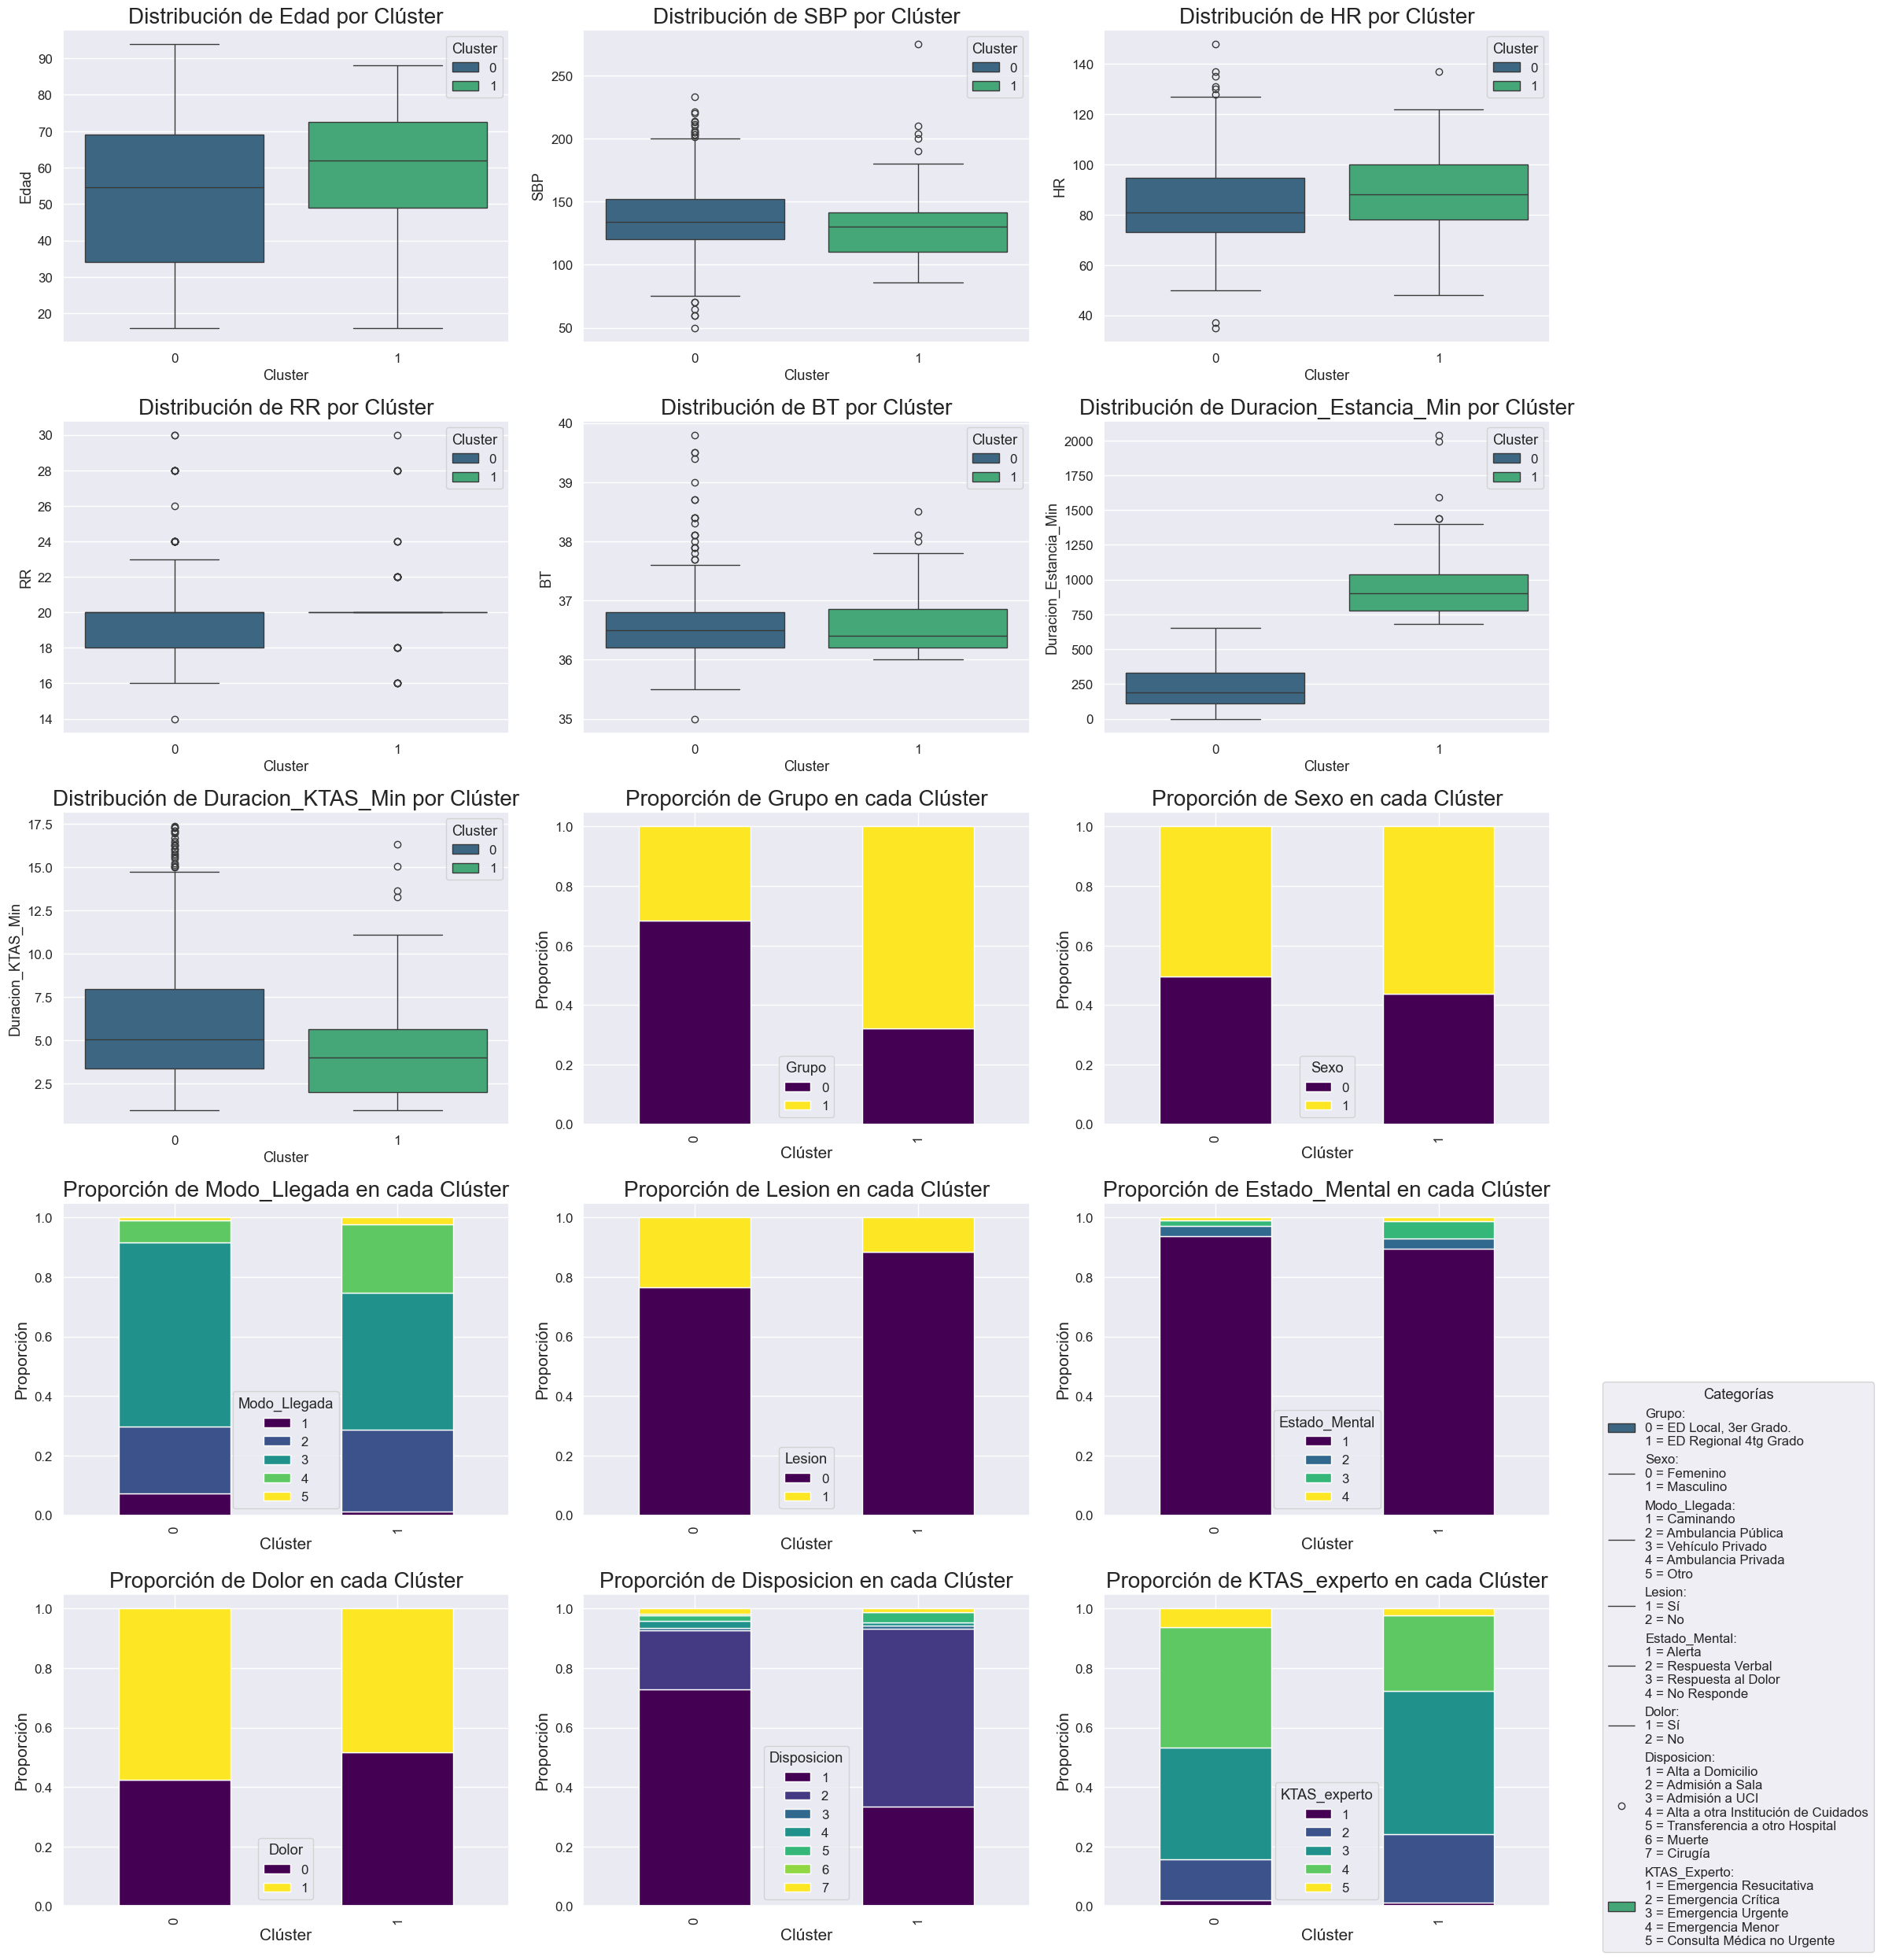

In [208]:
# Definir las variables categóricas y numéricas
numerical_features = ['Edad', 'SBP', 'HR', 'RR', 'BT', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min']
categorical_features = ['Grupo', 'Sexo', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 'Dolor', 'Disposicion', 'KTAS_experto']

# Crear una figura grande con subplots
total_features = len(numerical_features) + len(categorical_features)
rows = (total_features + 2) // 3  # Número de filas para los subplots
plt.figure(figsize=(20, rows * 5))

# Colores para las categorías
palette = sns.color_palette('viridis', n_colors=5)

# Crear los boxplots para las variables numéricas
for i, feature in enumerate(numerical_features):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x='Cluster', y=feature, hue = 'Cluster', data=data_ac, palette='viridis')
    sns.set(font_scale=1.1)
    plt.title(f'Distribución de {feature} por Clúster', fontsize=20)
    plt.tight_layout()

# Crear gráficos de barras apiladas para las variables categóricas
for i, feature in enumerate(categorical_features):
    plt.subplot(rows, 3, len(numerical_features) + i + 1)
    
    # Contar la proporción de cada categoría por cluster
    cluster_dist = pd.crosstab(data_ac['Cluster'], data_ac[feature], normalize='index')
    
    # Graficar usando seaborn
    cluster_dist.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title(f'Proporción de {feature} en cada Clúster', fontsize=20)
    plt.ylabel('Proporción', fontsize=15)
    plt.xlabel('Clúster', fontsize=15)
    plt.legend(title=feature)
    plt.tight_layout()

legend_labels = [
    'Grupo:\n0 = ED Local, 3er Grado.\n1 = ED Regional 4tg Grado',
    'Sexo:\n0 = Femenino\n1 = Masculino',
    'Modo_Llegada:\n1 = Caminando\n2 = Ambulancia Pública\n3 = Vehículo Privado\n4 = Ambulancia Privada\n5 = Otro',
    'Lesion:\n1 = Sí\n2 = No',
    'Estado_Mental:\n1 = Alerta\n2 = Respuesta Verbal\n3 = Respuesta al Dolor\n4 = No Responde',
    'Dolor:\n1 = Sí\n2 = No',
    'Disposicion:\n1 = Alta a Domicilio\n2 = Admisión a Sala\n3 = Admisión a UCI\n4 = Alta a otra Institución de Cuidados\n5 = Transferencia a otro Hospital\n6 = Muerte\n7 = Cirugía',
    'KTAS_Experto:\n1 = Emergencia Resucitativa\n2 = Emergencia Crítica\n3 = Emergencia Urgente\n4 = Emergencia Menor\n5 = Consulta Médica no Urgente'
]

plt.figlegend(legend_labels, bbox_to_anchor=(1.2, 0), loc='lower right', title='Categorías')
plt.show()

#### Interpretación del comportamiento de las características para cada cluster:

**Edad y Duración de Estancia:**

Se puede observar que el cluster 1, que representa un grupo pequeño de pacientes (87), tiene una duración de estancia mucho mayor para el cluster 0. Además, el cluster 1 contiene a las más personas de edad avanzada, sobre todo entre 50 y 75 años, mientras que el cluster 0 contiene personas de edades más jóvenes, aunque un poco más variadas (35-70 años). Esto quiere decir que el cluster 1 agrupa a las personas que requieren una atención más prolongada por la severidad de su condición y que además esto en general coincide con las personas de edad más avanzada.

**KTAS Experto:**

Además, podemos ver que la gravedad de la emergencia también cambia según la edad. Para el cluster 1 las categorías KTAS  más frecuentes son la 2 (Emergencia Crítica) y la 3 (Emergencia Urgente), y además se presentan en una mayor proporción con respecto al cluster 0. Mientras que para el cluster 0 las categorías 4 (Emergencia Menor) y 5 (consulta médica no urgente) se presentan en una mayor proporción con respecto al cluster 1. Esto sugiere que las personas mayores tienden a presentarse con urgencias más graves que las personas más jóvenes, ya que con una edad más avanzada tienen más riesgos, lo que también refuerza el hecho de que la duración de estancia tiende a ser más larga.

**Duración KTAS:**

Relacionado con lo anterior, vemos que la duración del diagnóstico del KTAS por el experto varía según los clusters. Para el cluster 1, que por lo general son personas mayores con emergencias más críticas, el diagnóstico es mucho más rápido porque seguramente es muy evidente su condición y la prioridad es empezar a tratar al paciente. Luego, el cluster 0 las duraciones del diagnóstico son más altas, lo que indica que estos pacientes pueden tener casos más complejos que requieran evaluaciones más detalladas o una intervención más prolongada.


**Disposición:**

Hay una diferencia en la Disposición de los pacientes de cada cluster y es que para el cluster 0 la mayoría de pacientes son dados de alta, mientras que los del cluster 1 la mayoría son admitidos a sala. Esto muestra de nuevo que el cluster 0 presenta condiciones menores, mientras que el cluster 1 presenta con condiciones más graves.


**Modo de llegada:**

También se ven diferencias en el **modo de llegada** de los clusters. El cluster 0 llega con más frecuencia en vehículo privado, mientras que el 1 llega más en ambulancia pública o privada. Esto tiene sentido por las edades y las gravedades de las condiciones previamente mencionadas, ya que es más probable que un adulto mayor con una emergencia crítica llegue en ambulancia mientras que alguien más joven con una emergencia menor llegue en vehículo privado.


**Grupo:** 

La variable **Grupo** tiene una variación entre clusters, ya que el cluster 1 pertenece sobre todo al grupo 1 (ED Local, 3er Grado) y los otros dos clusters sobretodo al grupo 2 (ED Regional 4tg Grado).

**Estado Mental:**

En el estado mental hay una pequeña diferencia y es que se ve una mayor proporción en los pacientes que solo responden al dolor pero que no están alerta.

**Dolor:**

El dolor también tiene una ligera diferencia, ya que el cluster 1 tiene más pacientes uqe presentan dolor, lo que tiene sentido con lo explicado anteriormente.

**Lesión:**
Los pacientes del cluster 1 presentan menos lesiones que los del cluster 0.

\
Otras características:

En cuanto a la **temperatura corporal (BT)**, no hay diferencias muy marcadas ya que en general la mayoría de personas llega con una temperatura normal. El **sexo**, la **frecuencia respiratoria (RR)**, la **Frecuencia Cardíaca (HR)** y la **presión arterial (SBP)** tampoco cambian considerablemente, ya que estas por lo general no cambian tanto con la edad, sino solo por alguna condición en específico del paciente.


#### Modelo K-means
Implementado por: Juana Mejía

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [210]:
#antes de iniciar con el algoritmo se deben manejar los datos atipicos ya que K-means es un algoritmo sensible a estos. Esto se hace con la desviacion estandar ya que permite cierta variacion pero no datos atipicos 
import numpy as np

# Definir el umbral de desviaciones estándar 
umbral = 4

# Filtrar los valores que están dentro de 4 desviaciones estándar de la media
X_sinAtipicos = X[(np.abs(X - X.mean()) <= (umbral * X.std())).all(axis=1)]

In [211]:
def buscar_modelo(k, semilla):
    print(f"Entrenando el modelo con k={k} y semilla={semilla}.")
    model = KMeans(n_clusters=k,random_state=semilla, init='random', n_init=1)
    model.fit(X_sinAtipicos)

    return model.inertia_
candidatos = [9,22,33,42,50]
grupos = range(2,10)
distorsions = dict()

for semilla in candidatos:
    distorsions[semilla] = list()
    for k in grupos:
        inertia = buscar_modelo(k, semilla)
        distorsions[semilla].append(inertia)
        print("Score:",inertia)
        print('-'*50)

Entrenando el modelo con k=2 y semilla=9.
Score: 15953978.783854479
--------------------------------------------------
Entrenando el modelo con k=3 y semilla=9.
Score: 8576040.419126375
--------------------------------------------------
Entrenando el modelo con k=4 y semilla=9.
Score: 5808296.522681599
--------------------------------------------------
Entrenando el modelo con k=5 y semilla=9.
Score: 4033194.7689263
--------------------------------------------------
Entrenando el modelo con k=6 y semilla=9.
Score: 2922533.389561628
--------------------------------------------------
Entrenando el modelo con k=7 y semilla=9.
Score: 2315417.623027484
--------------------------------------------------
Entrenando el modelo con k=8 y semilla=9.
Score: 2073640.7260551096
--------------------------------------------------
Entrenando el modelo con k=9 y semilla=9.
Score: 1889607.469496381
--------------------------------------------------
Entrenando el modelo con k=2 y semilla=22.
Score: 159539

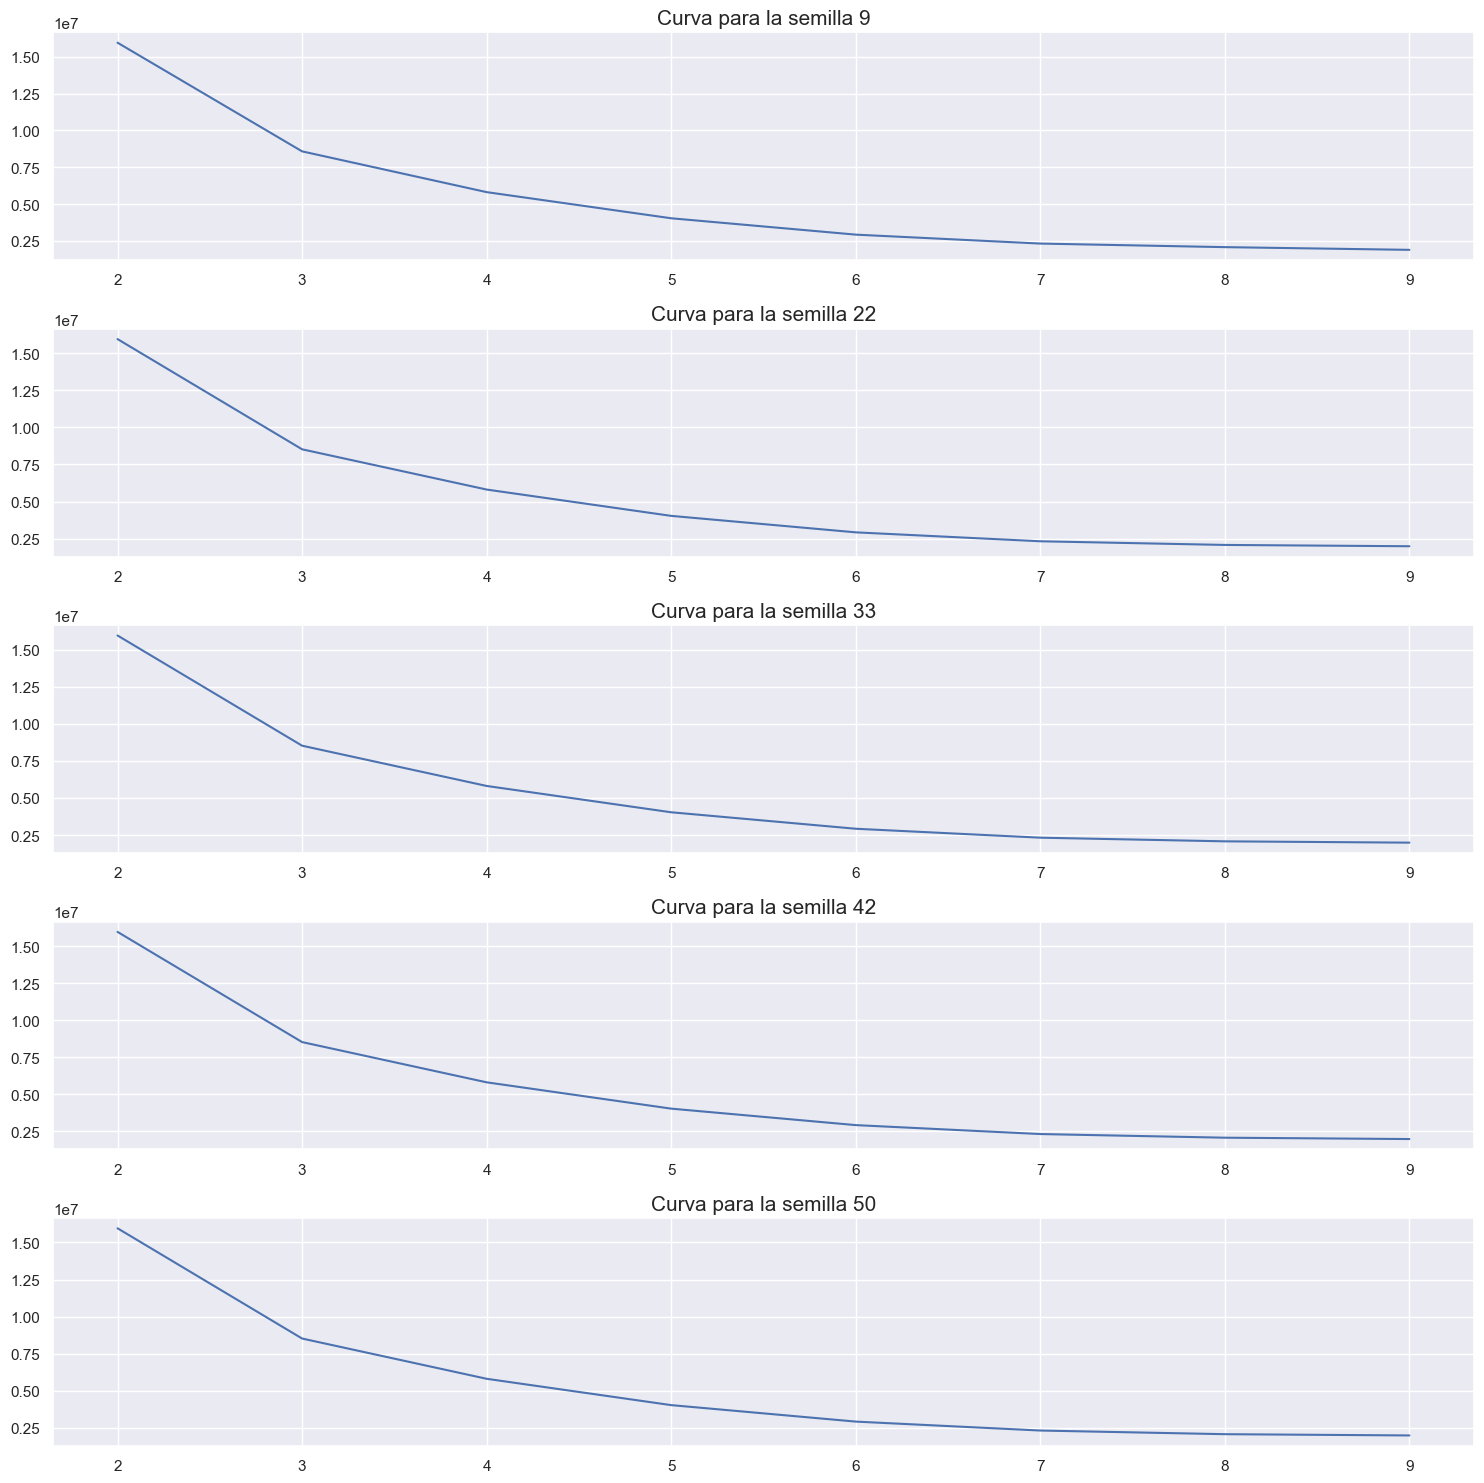

In [212]:
fig = plt.figure(figsize=(15, 15))

for i, sem in enumerate(candidatos):
    ax = plt.subplot(len(candidatos), 1, i + 1)
    plt.plot(grupos, distorsions[sem])
    plt.grid(True)
    plt.title(f'Curva para la semilla {sem}', fontsize=15)
    plt.tight_layout()
plt.show()

Gracias a este grafico podemos revisar que para todas las diferentes semillas k=3 es el valor optimo para los grupos en el kmeans, esto se debe a que luego de este se obtiene un comportamiento casi lineal luego de pasar por este valor.

### Metodo de la silueta

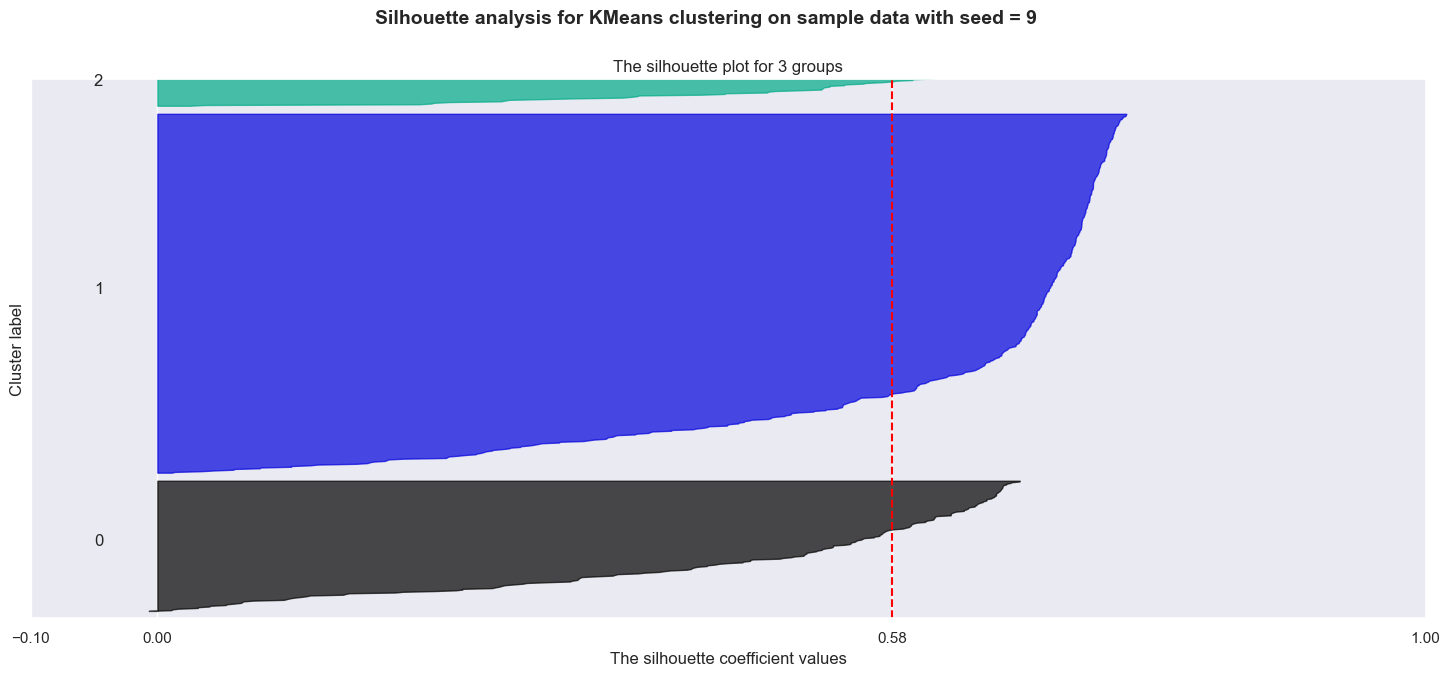

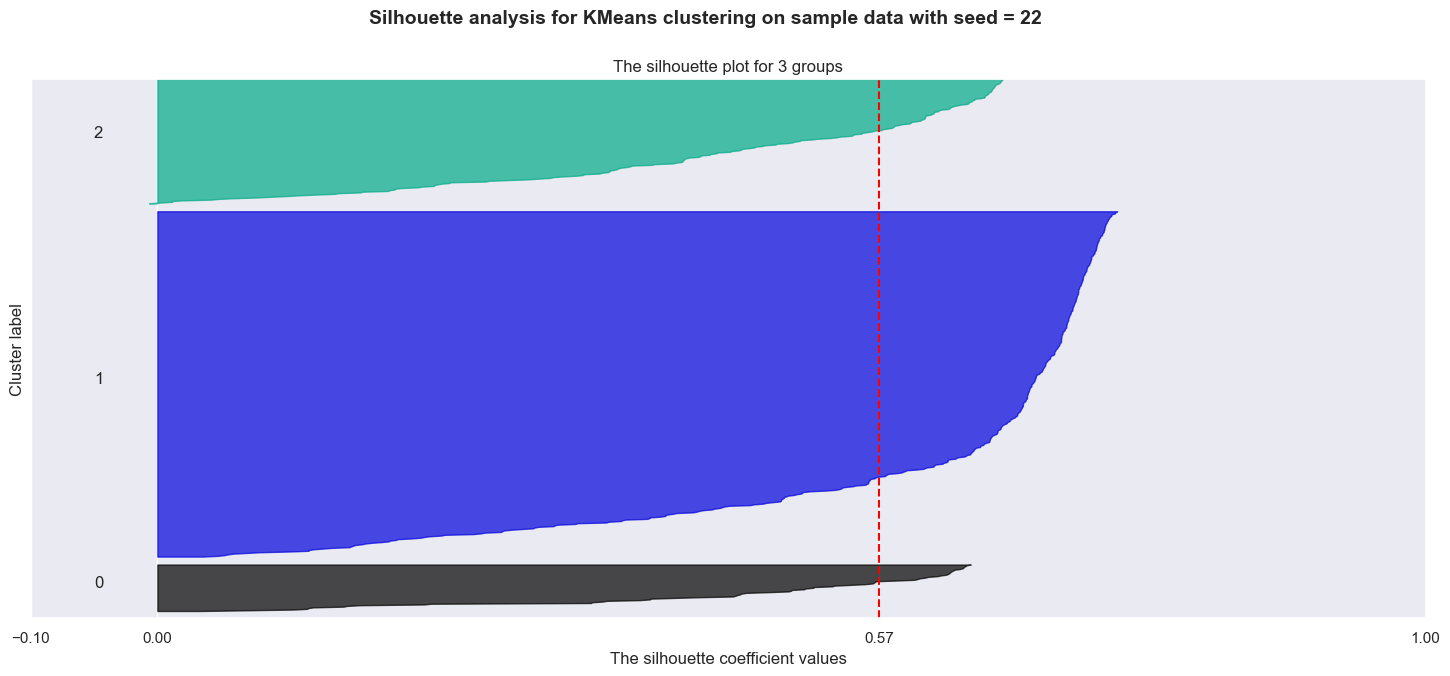

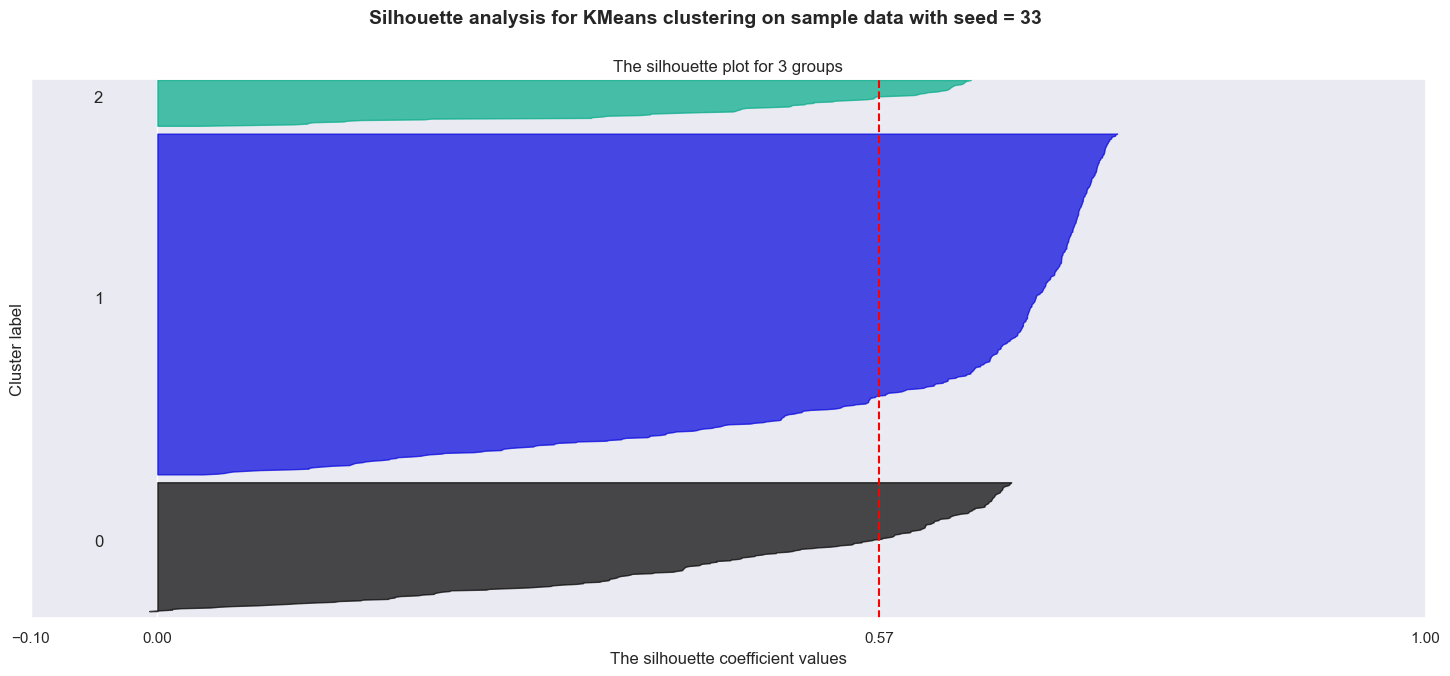

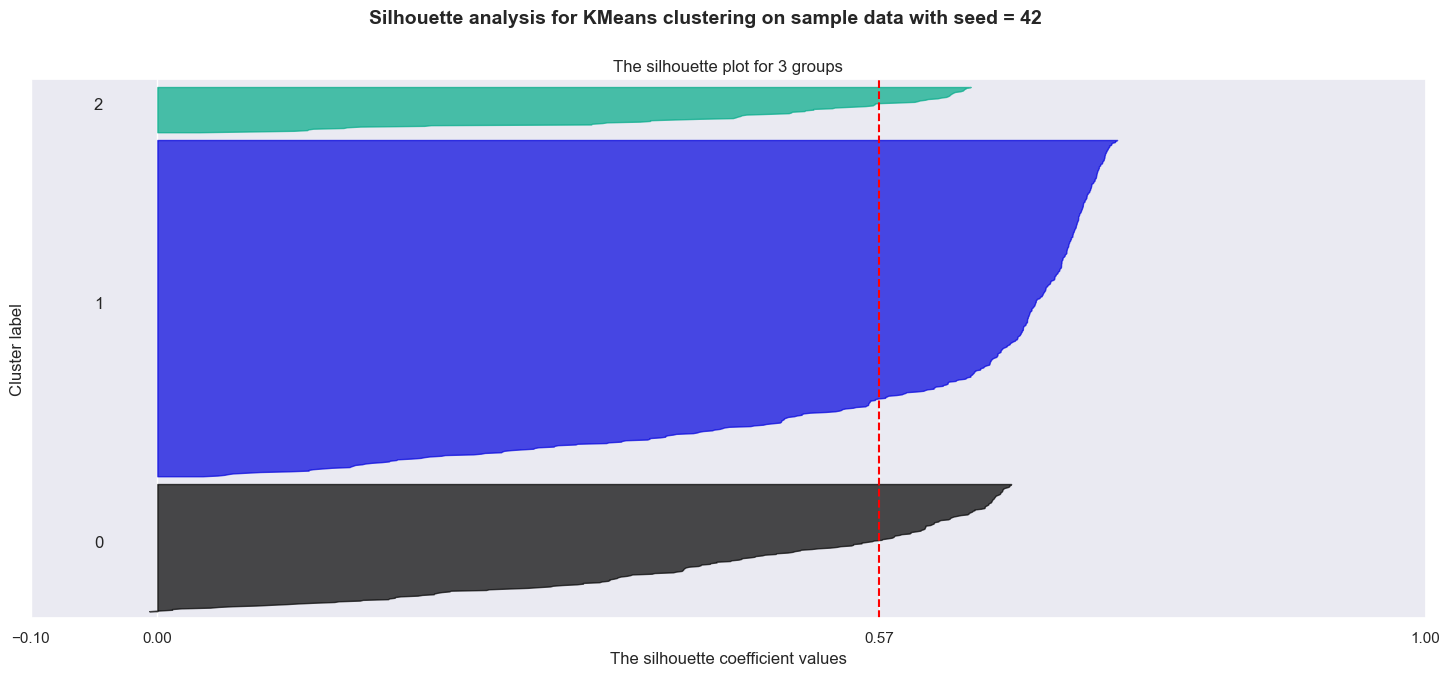

In [213]:
valores = [(9,3),
           (22,3),
           (33,3),
           (42,3),
           ]

for n, valor in enumerate(valores):
    semilla, k = valor
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 0.2])
    ax1.set_ylim([0, len(X_sinAtipicos) + (n + 1) * 10])

    clusterer = KMeans(n_clusters=k, random_state=semilla, init='random', n_init=1)
    cluster_labels = clusterer.fit_predict(X_sinAtipicos)


    silhouette_avg = silhouette_score(X_sinAtipicos, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_sinAtipicos, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / 5)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for {k} groups")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, silhouette_avg, 1.0])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with seed = %d"
        % semilla,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Por medio del metodo de la sombra se puede ver que con k=3 los grupos tienen un valor por encima de 0.5 lo que indica que un punto esta bien agrupado y que es similar a otros puntos en su cluster. Como todos pasan la prueba se escoge el seed 22 debido a que presenta holgura entre cada cluster para pasar la prueba.  

In [233]:
k = 3
semilla = 22

final_model = KMeans(n_clusters=k, random_state=semilla, init='random', n_init=1)
final_model.fit(X_sinAtipicos)

KMeans(init='random', n_clusters=3, n_init=1, random_state=22)

El numero de clientes por cluster es:


{0: 65, 1: 477, 2: 181}

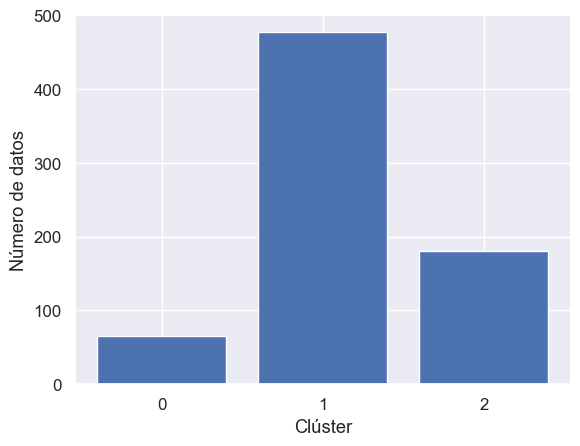

In [234]:
labels_km = final_model.labels_
indexes, values = np.unique(labels_km, return_counts=True)
rects = plt.bar(indexes, values)
plt.xlabel('Clúster')
plt.ylabel('Número de datos')
plt.xticks(indexes)
print('El numero de clientes por cluster es:')
{indexes[i]: values[i] for i in range(len(indexes))}

In [235]:
data_rev = X_sinAtipicos.copy()

# Variables categóricas (ya codificadas) que necesitan ser revertidas
original_columns = ['Disposicion', 'Modo_Llegada', 'Estado_Mental']

for col in original_columns:
    # Filtrar las columnas que pertenecen a cada variable original 
    one_hot_cols = [c for c in data_rev.columns if c.startswith(col + '_')]
    
    # Crear una columna que retome el valor de la categoría original
    data_rev[col] = data_rev[one_hot_cols].apply(lambda row: int(row.idxmax().split('_')[-1]) if row.max() == 1 else 1, axis=1)
    
    # Eliminar las columnas one-hot codificadas
    data_rev.drop(one_hot_cols, axis=1, inplace=True)

data_rev.head()

,Grupo,Sexo,Edad,Lesion,Dolor,SBP,HR,RR,BT,KTAS_experto,Duracion_Estancia_Min,Duracion_KTAS_Min,Disposicion,Modo_Llegada,Estado_Mental
2,1,0,61,1,1,100.0,84.0,20.0,36.4,4,119,2.00,1,3,1
3,1,1,61,0,1,120.0,76.0,20.0,36.5,3,414,2.00,1,3,1
4,0,1,67,0,0,143.0,130.0,20.0,38.1,2,267,3.60,1,3,1
6,0,0,74,0,1,118.0,77.0,16.0,36.9,3,56,8.72,1,3,1
9,1,1,27,0,1,130.0,92.0,20.0,36.5,4,493,2.00,1,2,1


In [236]:
clusters = final_model.fit_predict(X_sinAtipicos)
data_rev['Cluster'] = clusters

cluster_summary = data_rev.groupby('Cluster').agg({
    'Grupo': ['mean', 'std', 'median'],
    'Sexo': ['mean', 'std', 'median'],
    'Edad': ['mean', 'std', 'median'],
    'Modo_Llegada': ['mean', 'std', 'median'],
    'Lesion': ['mean', 'std', 'median'],
    'Estado_Mental': ['mean', 'std', 'median'],
    'Dolor': ['mean', 'std', 'median'],
    'SBP': ['mean', 'std', 'median'],
    'HR': ['mean', 'std', 'median'],
    'RR': ['mean', 'std', 'median'],
    'BT': ['mean', 'std', 'median'],
    'Disposicion': ['mean', 'std', 'median'],
    'KTAS_experto': ['mean', 'std', 'median'],
    'Duracion_Estancia_Min': ['mean', 'std', 'median'],
    'Duracion_KTAS_Min': ['mean', 'std', 'median']
})

# Mostrar el resumen del clúster
cluster_summary

Grupo                       Sexo                        Edad  \
             mean       std median      mean       std median       mean   
Cluster                                                                    
0        0.753846  0.434122    1.0  0.553846  0.500961    1.0  58.092308   
1        0.205451  0.404455    0.0  0.515723  0.500277    1.0  49.174004   
2        0.596685  0.491924    1.0  0.441989  0.498001    0.0  58.110497   

                          Modo_Llegada                     Lesion            \
               std median         mean       std median      mean       std   
Cluster                                                                       
0        19.611638   63.0     2.892308  0.709821    3.0  0.092308  0.291712   
1        19.426037   50.0     2.689727  0.679965    3.0  0.274633  0.446798   
2        18.851141   62.0     2.767956  0.731263    3.0  0.116022  0.321140   

               Estado_Mental                 Dolor                   \
        median          mean  std median      mean       std median   
Cluster                                                               
0          0.0           1.0  0.0    1.0  0.569231  0.499038    1.0   
1          0.0           1.0  0.0    1.0  0.633124  0.482458    1.0   
2          0.0           1.0  0.0    1.0  0.546961  0.499171    1.0   

                SBP                           HR                           RR  \
               mean        std median       mean        std median       mean   
Cluster                                                                         
0        130.092308  24.583864  130.0  86.446154  16.361188   86.0  19.969231   
1        139.157233  24.923463  138.0  82.719078  15.419918   80.0  18.811321   
2        131.662983  27.546773  126.0  84.911602  15.129549   83.0  19.392265   

                                 BT                  Disposicion            \
              std median       mean       std median        mean       std   
Cluster                                                                      
0        1.249615   20.0  36.556923  0.477287   36.4    1.630769  0.486352   
1        1.755555   20.0  36.554927  0.453374   36.5    1.109015  0.311985   
2        1.607533   20.0  36.523204  0.463097   36.5    1.430939  0.496581   

               KTAS_experto                  Duracion_Estancia_Min  \
        median         mean       std median                  mean   
Cluster                                                              
0          2.0     3.246154  0.729528    3.0            914.830769   
1          1.0     3.580713  0.769894    4.0            141.316562   
2          1.0     3.165746  0.726589    3.0            438.082873   

                           Duracion_KTAS_Min                   
                std median              mean       std median  
Cluster                                                        
0        211.048171  857.0          4.403077  3.006280    4.0  
1         76.321814  138.0          6.510084  3.580980    5.7  
2        104.775521  414.0          4.873702  3.337263    4.0

Ahora que se tienen los centroides se procede con la Interpretacion
### Interpretacion de Resultados

**Cluster 0 (65 personas):**  Para los pacientes que pertenecen a este cluster, la mayoria de los pacientes llegan por sus propios pedios (vehiculo propio) ya que tienen un promedio de 2.89.La mayoria no presentan lesiones (media=0.09), tienen un estado mental alerta (1) y aproximadamente la mitad de los pacientes experimentan dolor (0.57) Los signos vitales se ven normales para este grupo de pacientes. Tambien se puede ver que los pacientes son admitidos a sala (media=1.63)ya que son emergencias urgentes (3.2) y finalmente la estancia media de estos pacientes es de 914.83 minutos. Esto sugiere que los pacientes tienen una estancia más larga, que puede estar explicada por su edad promedio de 58.55 años.  <br><br>
**Cluster 1 (477 personas):** Este segmento tiene una edad promedio de 49.17, con signos vitales normales, aunque un poco menores que los del cluster 1. Como el cluster 0, los pacientes llegan en Vehiculo Privado (media= 2.68), estos son dados en alta a Domicilios (media=1.1).Todo esto conjunto genera que las estancias sean de una media de 141.32 minutos, más corta que el Cluster 0 que puede darse por la edad más joven de los pacientes en este grupo. <br><br>
**Cluster 2(181 personas):** Este segmento tiene un promedio de 58.11 años,con signos vitales normales. La mayoria de pacientes llegua en vehiculo privado (2.77) y no presetna lesiones (0.11) Tienen mayor tendencia  a ser admitidos a sala (media=1.4).  Este segmento tiene una estancia de 438.08 minutos en promedio. 

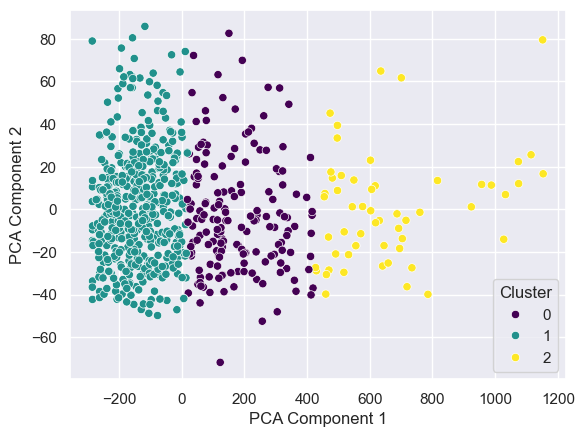

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_sinAtipicos)

# Create a new DataFrame with the PCA components and the Cluster column
pca_df = pd.DataFrame(pca_result, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['Cluster'] = clusters

# Plot the PCA-reduced data
sns.scatterplot(data=pca_df, x='PCA Component 1', y='PCA Component 2', hue='Cluster', palette='viridis')

# Show the plot
plt.show()



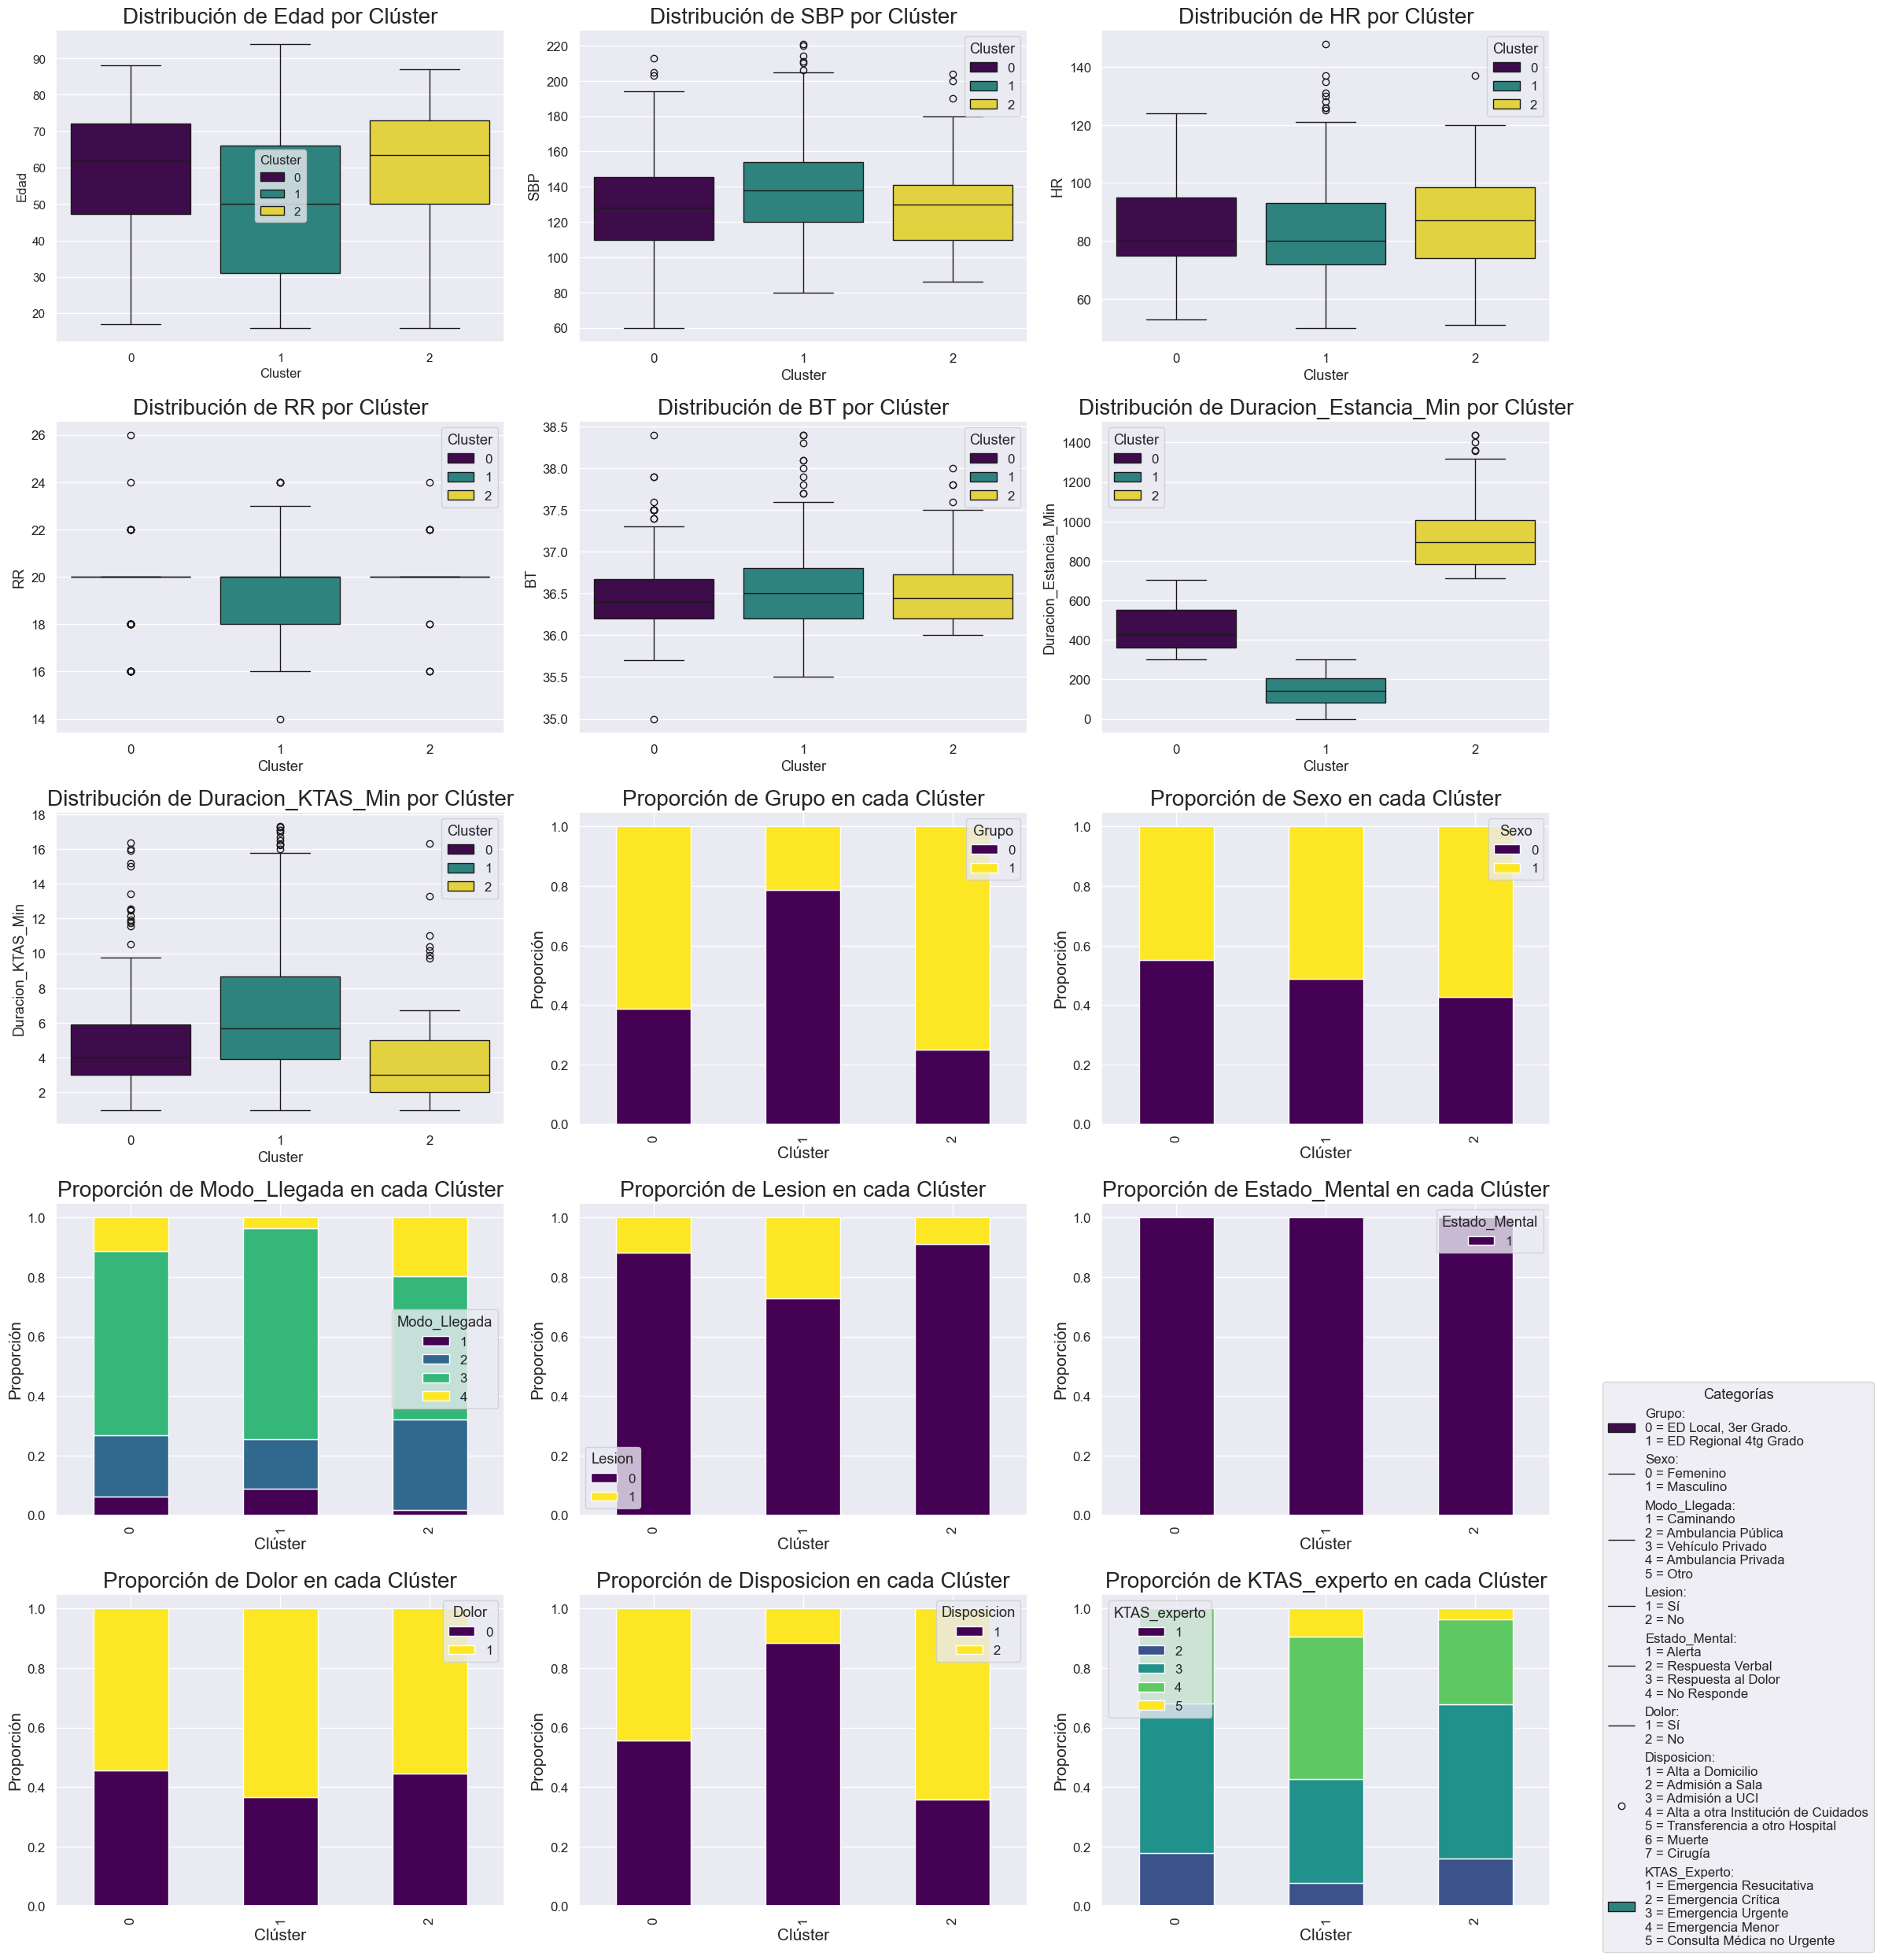

In [219]:
# Definir las variables categóricas y numéricas
numerical_features = ['Edad', 'SBP', 'HR', 'RR', 'BT', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min']
categorical_features = ['Grupo', 'Sexo', 'Modo_Llegada', 'Lesion', 'Estado_Mental', 'Dolor', 'Disposicion', 'KTAS_experto']

# Crear una figura grande con subplots
total_features = len(numerical_features) + len(categorical_features)
rows = (total_features + 2) // 3  # Número de filas para los subplots
plt.figure(figsize=(20, rows * 5))

# Colores para las categorías
palette = sns.color_palette('viridis', n_colors=5)

# Crear los boxplots para las variables numéricas
for i, feature in enumerate(numerical_features):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(x='Cluster', y=feature, hue = 'Cluster', data=data_rev, palette='viridis')
    sns.set(font_scale=1.1)
    plt.title(f'Distribución de {feature} por Clúster', fontsize=20)
    plt.tight_layout()

# Crear gráficos de barras apiladas para las variables categóricas
for i, feature in enumerate(categorical_features):
    plt.subplot(rows, 3, len(numerical_features) + i + 1)
    
    # Contar la proporción de cada categoría por cluster
    cluster_dist = pd.crosstab(data_rev['Cluster'], data_rev[feature], normalize='index')
    
    # Graficar usando seaborn
    cluster_dist.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='viridis')
    plt.title(f'Proporción de {feature} en cada Clúster', fontsize=20)
    plt.ylabel('Proporción', fontsize=15)
    plt.xlabel('Clúster', fontsize=15)
    plt.legend(title=feature)
    plt.tight_layout()

legend_labels = [
    'Grupo:\n0 = ED Local, 3er Grado.\n1 = ED Regional 4tg Grado',
    'Sexo:\n0 = Femenino\n1 = Masculino',
    'Modo_Llegada:\n1 = Caminando\n2 = Ambulancia Pública\n3 = Vehículo Privado\n4 = Ambulancia Privada\n5 = Otro',
    'Lesion:\n1 = Sí\n2 = No',
    'Estado_Mental:\n1 = Alerta\n2 = Respuesta Verbal\n3 = Respuesta al Dolor\n4 = No Responde',
    'Dolor:\n1 = Sí\n2 = No',
    'Disposicion:\n1 = Alta a Domicilio\n2 = Admisión a Sala\n3 = Admisión a UCI\n4 = Alta a otra Institución de Cuidados\n5 = Transferencia a otro Hospital\n6 = Muerte\n7 = Cirugía',
    'KTAS_Experto:\n1 = Emergencia Resucitativa\n2 = Emergencia Crítica\n3 = Emergencia Urgente\n4 = Emergencia Menor\n5 = Consulta Médica no Urgente'
]

plt.figlegend(legend_labels, bbox_to_anchor=(1.2, 0), loc='lower right', title='Categorías')
plt.show()

### Modelo DBScan
Implementado por: Pablo Ortega

Normalización de los datos

In [220]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

dataScaled = scaler.fit_transform(data)

dataScaled = pd.DataFrame(dataScaled)
dataScaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.352179,0.510012,0.474887,0.437279,0.222615,0.035728,0.565371,0.378621,0.436787,0.331198,0.324794,0.088143,0.580389,0.151201,0.302538
std,0.477931,0.500194,0.253107,0.188785,0.416247,0.148033,0.496000,0.120934,0.141474,0.132374,0.109385,0.185947,0.215690,0.139892,0.216109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.243590,0.250000,0.000000,0.000000,0.000000,0.306667,0.345133,0.250000,0.250000,0.000000,0.500000,0.057843,0.133170
50%,0.000000,1.000000,0.512821,0.500000,0.000000,0.000000,1.000000,0.364444,0.415929,0.375000,0.312500,0.000000,0.500000,0.105882,0.244349
75%,1.000000,1.000000,0.679487,0.500000,0.000000,0.000000,1.000000,0.444444,0.530973,0.375000,0.375000,0.166667,0.750000,0.201471,0.418448
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Es importante normalizar los datos al realizar DBSCAN porque este algoritmo utiliza distancias para definir la densidad de los puntos y formar los clusters. Si las características tienen diferentes escalas, aquellas con valores más grandes pueden dominar la métrica de distancia, distorsionando los resultados y afectando la formación de los clusters. La normalización asegura que todas las características contribuyan equitativamente al cálculo de distancias. Adicionalmente es importante estandarizar los datos antes de realizar PCA en la mayoría de los casos

In [221]:
from sklearn.decomposition import PCA

pca1 = PCA()
pca_df1 = pd.DataFrame(pca1.fit_transform(dataScaled))

pca1.explained_variance_

array([0.28279487, 0.26493613, 0.24161447, 0.15413491, 0.06550628,
       0.04822233, 0.03301902, 0.02754097, 0.0243816 , 0.02198886,
       0.01790067, 0.01430648, 0.01309143, 0.01190149, 0.00966739])

Como tener demasiadas dimensiones afecta negativamente a DBSCAN debido a la "maldición de la dimensionalidad", entonces recurriré a PCA para reducir las dimensiones que le pasaré al algoritmo. Sin embargo, antes de realizar PCA es importante determinar el número de dimensiones a utilizar. Esto se hace mediante el ratio of variance. Es importante revisar el ratio of variance porque este valor indica cuánta información o variabilidad de los datos está explicada por cada característica. 

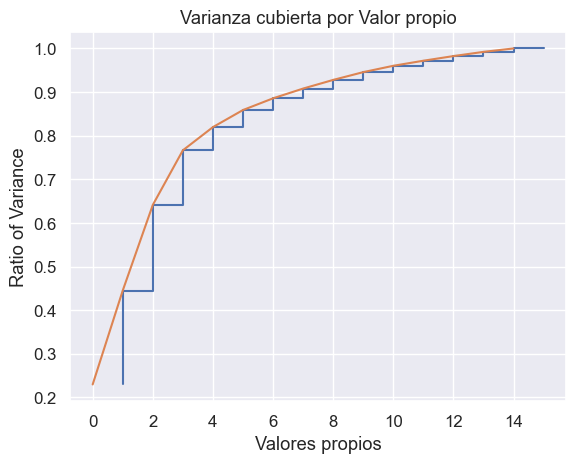

In [222]:
import numpy as np
plt.step(list(range(1,16)), np.cumsum(pca1.explained_variance_ratio_))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Valores propios')
plt.ylabel('Ratio of Variance')
plt.title('Varianza cubierta por Valor propio')
plt.show()

Se seleccionaran 10 dimensiones debido a que a partir de este punto se explica más del 95% de la varianza. PCA con 10 componentes:

In [223]:
pca = PCA(n_components = 10) 
pca_df = pca.fit_transform(dataScaled) 
pca_df = pd.DataFrame(pca_df) 
pca_df

,0,1,2,3,4,5,6,7,8,9
0,0.618734,0.040493,0.666581,-0.468542,0.151856,0.201935,-0.298138,0.005435,-0.008366,0.301748
1,0.674938,0.019167,0.640416,-0.398714,0.029230,0.592143,0.138400,0.235425,0.485147,-0.478921
2,0.952157,0.438647,-0.138094,0.641909,0.047822,-0.226118,0.062842,-0.023088,-0.027784,0.026798
3,0.635200,0.010507,0.595468,-0.459942,0.019010,-0.077373,-0.005079,-0.103272,-0.108462,0.007905
4,-0.696612,-0.314477,0.397279,-0.122134,0.148460,0.104947,0.108960,-0.299776,0.113770,0.405113
...,...,...,...,...,...,...,...,...,...,...
844,-0.705040,-0.365908,0.329669,-0.113159,0.055020,-0.169280,0.400216,0.128219,0.078304,-0.137833
845,-0.681244,0.347900,-0.296846,0.155211,-0.275337,0.319839,0.004370,0.027592,0.067921,0.017677
846,0.078820,-0.544280,-0.045146,-0.512105,0.210415,0.145221,-0.203959,-0.237408,-0.081230,0.141633
847,-0.617184,0.318884,-0.330766,0.186135,-0.557003,0.152582,0.016299,-0.194707,0.150820,-0.015798


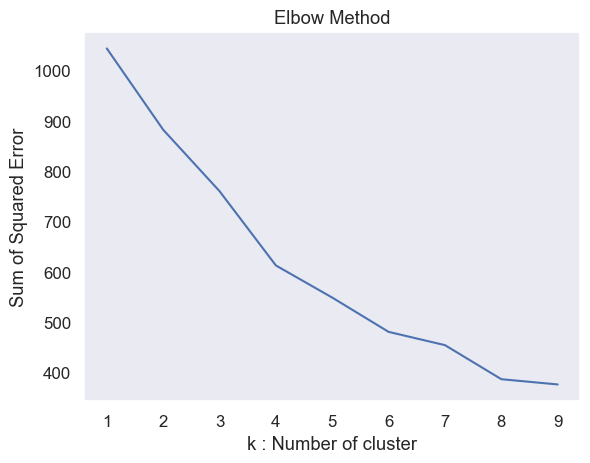

In [224]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
sse = {}


for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dataScaled)
    sse[k] = kmeans.inertia_ 
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()


plt.show()

Se realiza la prueba del gráfico de k-distancia para seleccionar el valor de epsilon, que es un hiperparametro de DBSCAN, que es fundamental para definir la proximidad entre puntos y la formación de clusters. La prueba consiste en calcular la distancia al k-esimo vecino más cercano para cada punto, ordenarlas y graficarlas. Al observar el gráfico, se identifica un punto de inflexión donde la pendiente cambia bruscamente, lo que indica un cambio en la densidad de los datos. La conclusión es que el valor de epsilon se elige en este punto critico, asegurando una mejor identificación de clusters al establecer un umbral óptimo para los vecinos cercanos. Note que antes de realizar la prueba se debe escojer el hiperparámetro de knn mediante kmeans, con el método del codo. En este caso decidí 8 clusters.

Text(0.5, 1.0, 'K-Distance Graph')

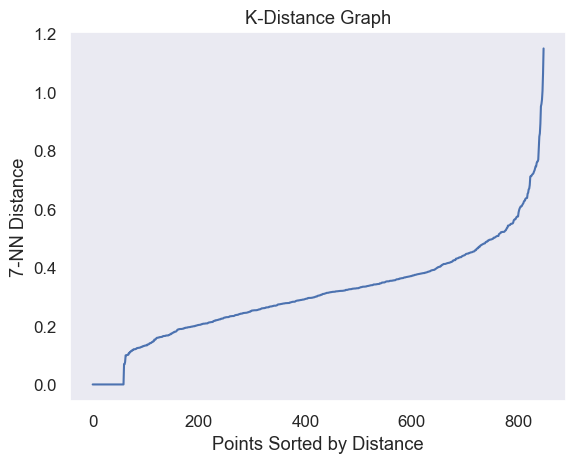

In [225]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors = 8)
model = knn.fit(dataScaled)
distances, indices = knn.kneighbors(dataScaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')

Basado en el punto de inflexión del gráfico de k-distancia decidí utilizar un epsilon de 0.5 para el DBscan.

In [226]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=11)
labels_db = dbscan.fit_predict(pca_df)


n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print(f"Número de clusters encontrados por DBSCAN: {n_clusters}")

DBSCAN_dataset = pca_df.copy()
DBSCAN_dataset.loc[:,'Cluster'] = dbscan.labels_ 

Número de clusters encontrados por DBSCAN: 13


Se corrió el modelo con los dator normalizados y reducidos a 10 dimensiones mediante PCA. Los hiperparámetros seleccionados fueron: 

- Epsilon de 0.5: Seleccionado mediante el grádico de k-distancia
- min_samples: Se utilizó min_samples = D + 1 (Dimensiones+1) para asegurar que cada punto en un vecindario tenga suficientes vecinos, lo que ayuda a identificar clusters significativos y a filtrar el ruido en espacios de alta dimensión.

In [227]:
import numpy as np
np.unique(labels_db, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 84,  20,  49,  99, 108,  45,  52,  31,  64, 103,  98,  20,  46,
         30]))

Aquí vemos la cantidad de puntos por cluster para entender un poco la distribución de los puntos.

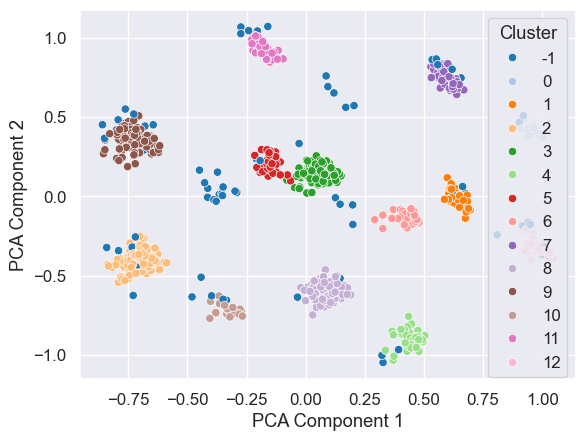

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

features = DBSCAN_dataset.drop(columns='Cluster')
clusters = DBSCAN_dataset['Cluster']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

pca_df2 = pd.DataFrame(pca_result, columns=['PCA Component 1', 'PCA Component 2'])
pca_df2['Cluster'] = clusters
data['Cluster']= clusters

sns.scatterplot(data=pca_df2, x='PCA Component 1', y='PCA Component 2', hue='Cluster', palette='tab20')

plt.show()


Se redujo la dimensionalidad aún más (de 10 a 2) para poder visualizar los clusters. Se ven clusters bien definidos y bien identificados los puntos extremos o atípicos. A continuación intentaré entender mejor estos clusters.

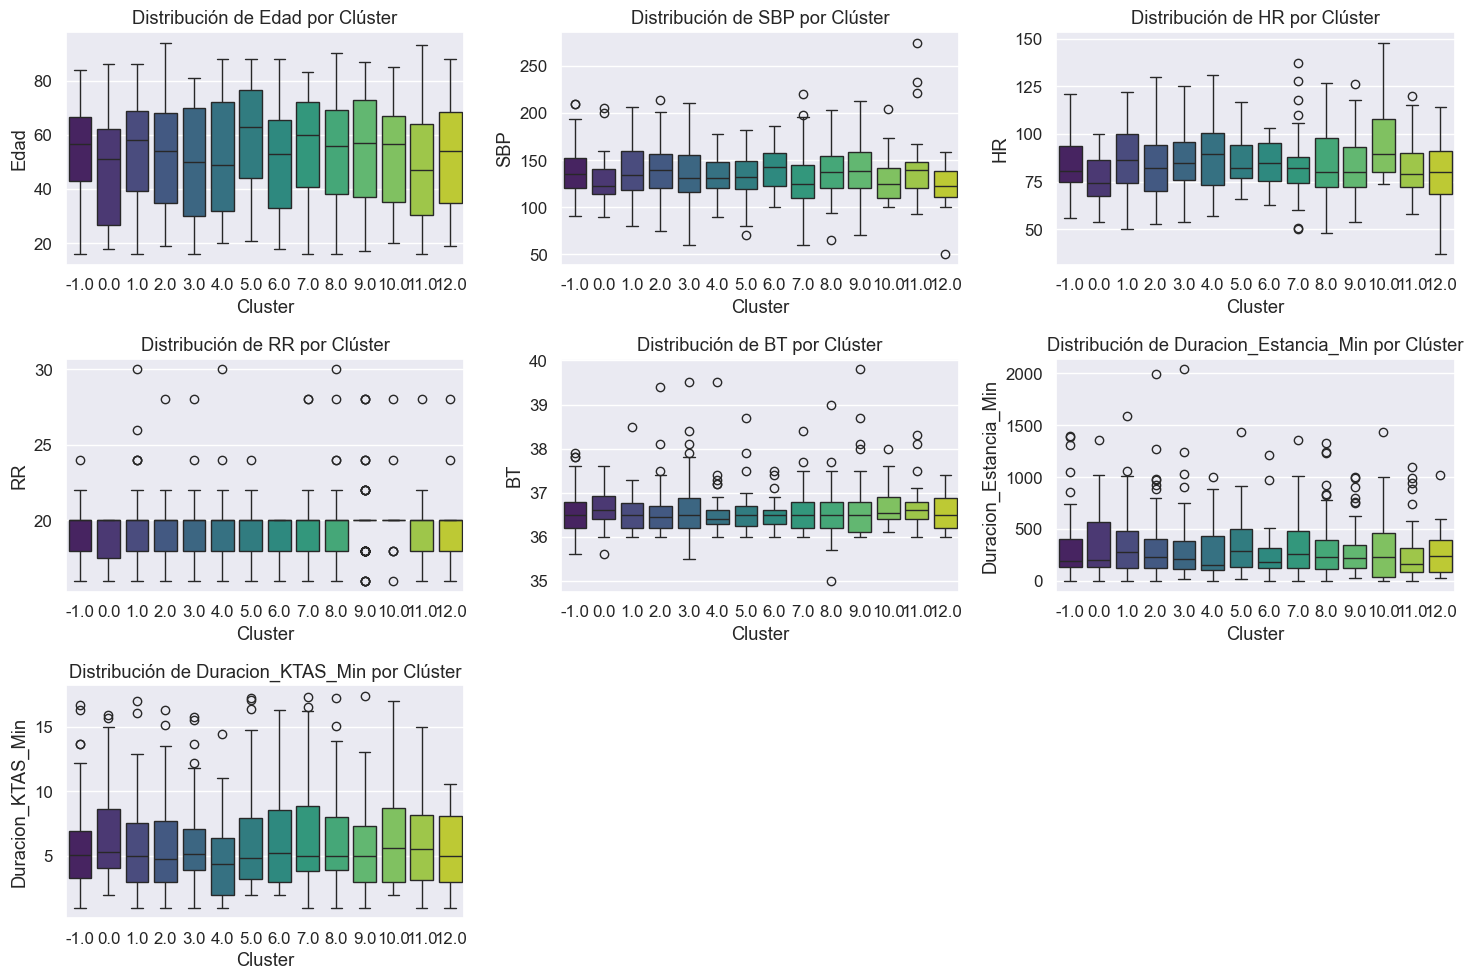

In [229]:

import seaborn as sns
import matplotlib.pyplot as plt

features = [ 'Edad',  'SBP', 'HR', 'RR', 'BT', 'Duracion_Estancia_Min', 'Duracion_KTAS_Min']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis')
    plt.title(f'Distribución de {feature} por Clúster')
    plt.tight_layout()

plt.show()


Con base en los gráficos de caja, se pueden identificar varios problemas en la interpretación de los clusters generados por DBSCAN:
1. La presencia de tantos clusters dificulta la identificación de patrones distintivos para cada uno. Esto complica la tarea de separar y entender las diferencias entre los clusters. Aunque DBSCAN identifica automáticamente el número de clusters y los valores atípicos, lo que puede ser beneficioso en ciertos contextos, en este caso resulta contraproducente. La multiplicidad de clusters puede llevar a una sobrecomplicación, haciendo que sea un desafío discernir características únicas o tendencias que definan cada grupo.

2. A simple vista, los boxplots no revelan patrones significativos entre las variables para perfilar los clusters en función de la lógica de negocio. No hay correlaciones evidentes que permitan caracterizar a los pacientes según las variables medidas. Sin patrones que permitan diferenciar a los pacientes, se dificulta la capacidad de realizar análisis más profundos para recomendar estrategias que puedan beneficiar a MediAlpes.

3. Cabe mencionar que se probó una gran cantidad de hiperparámetros para dbscan. Sin embargo, ninguno de estos dió un mejor resultado que los selecionados mediante el método explicado arriba.

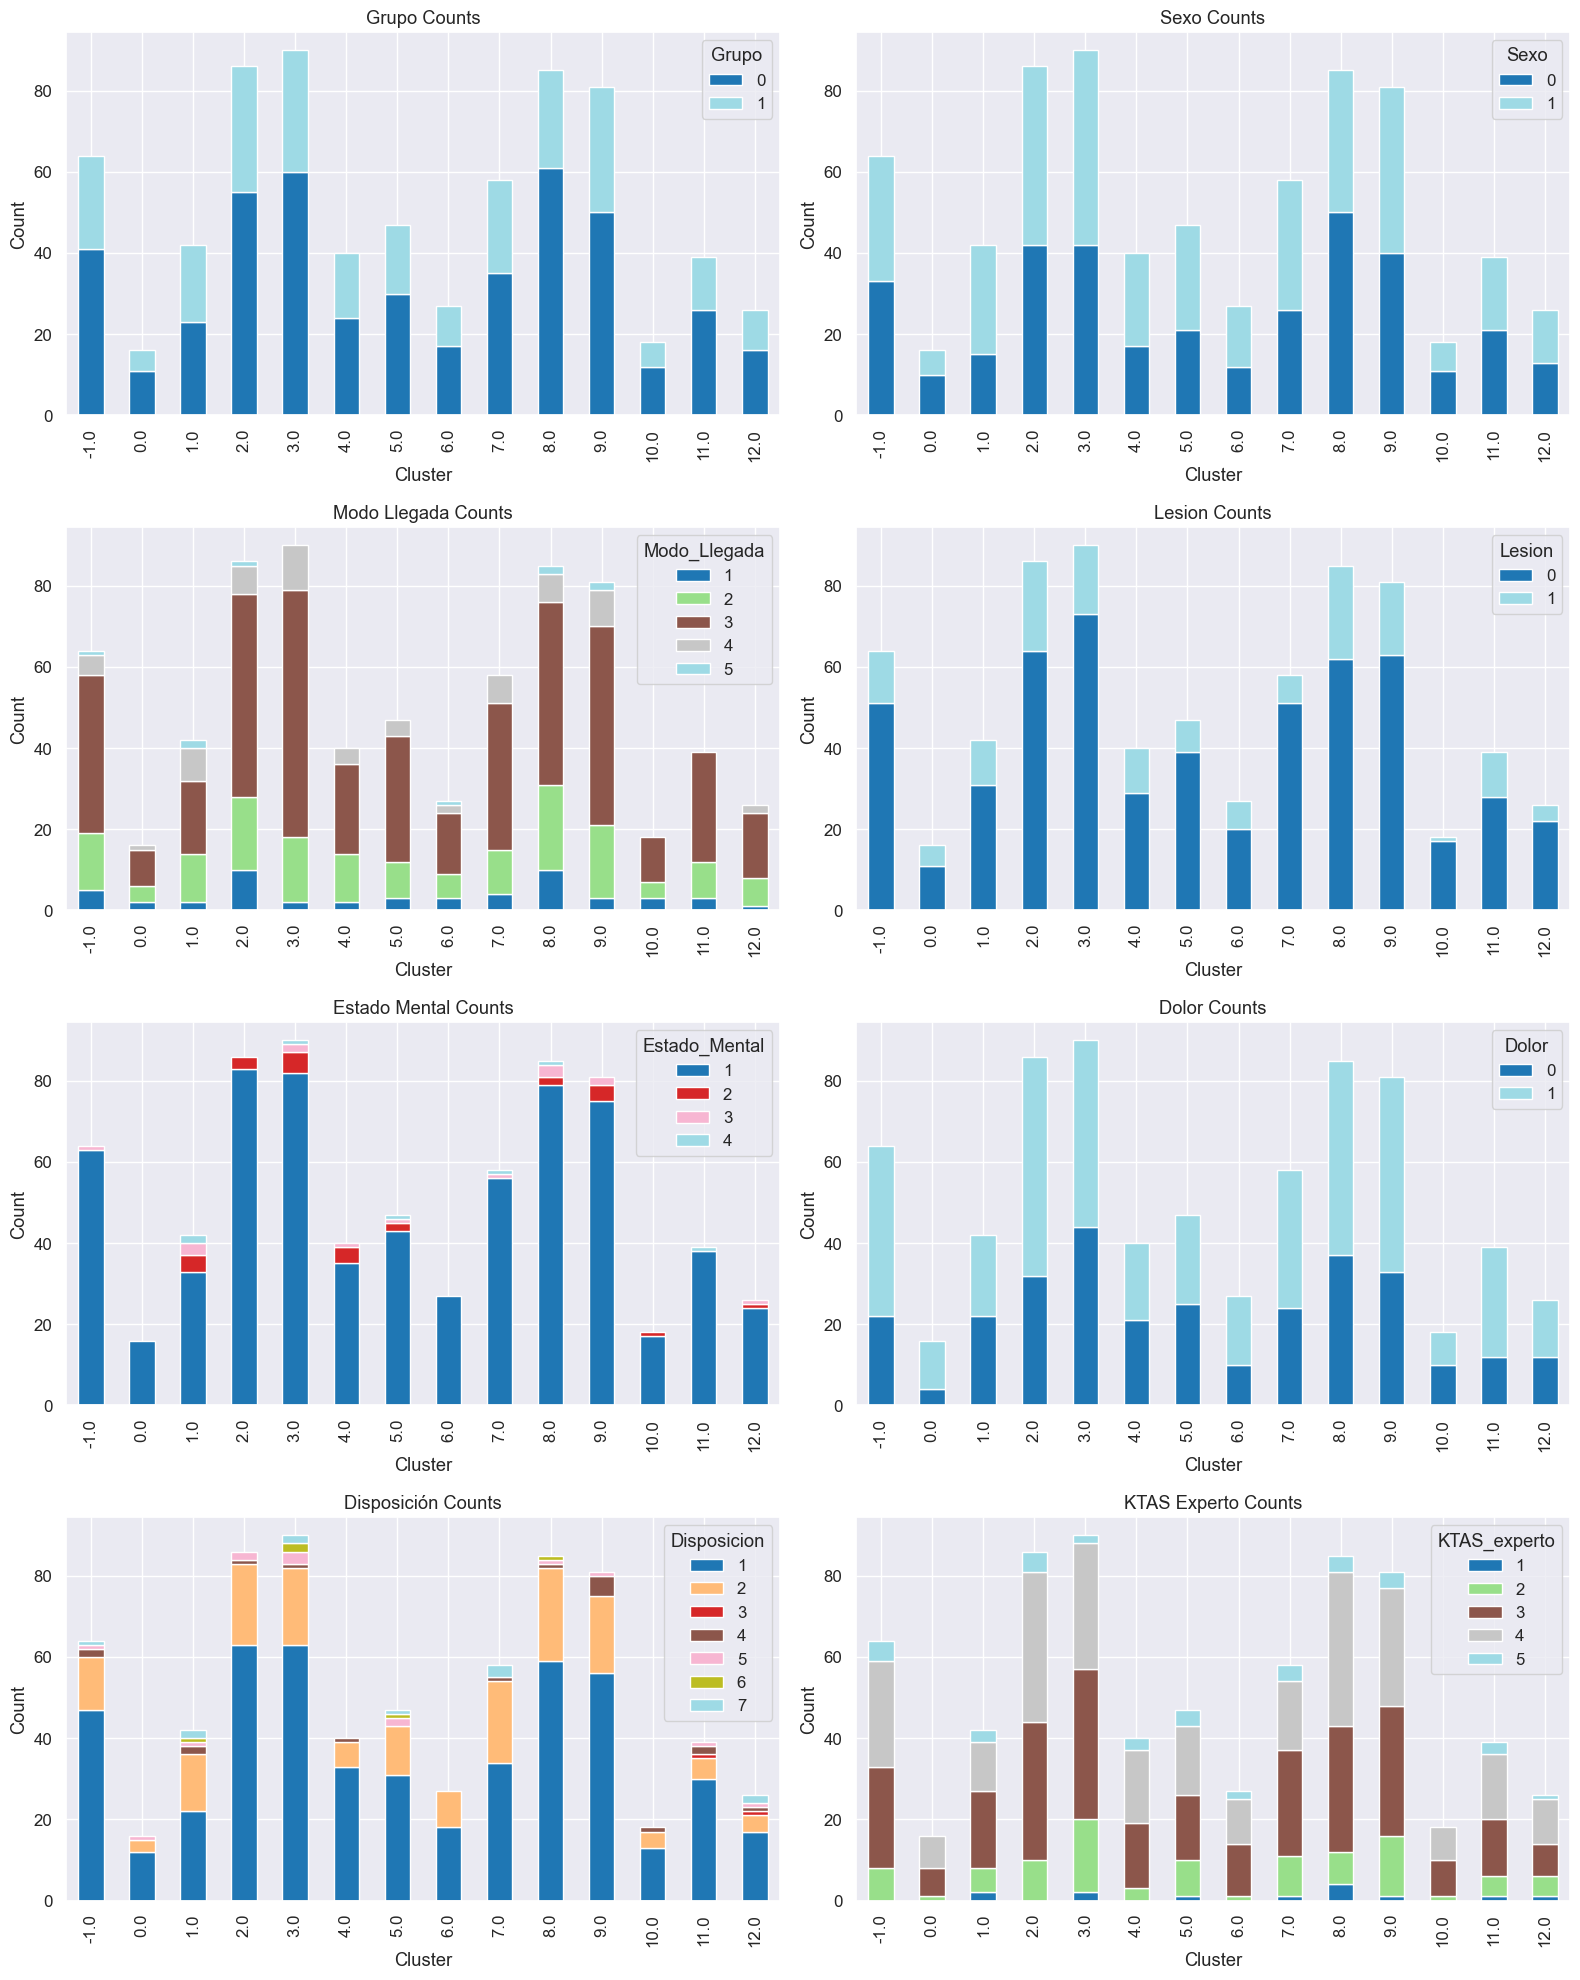

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

grupo_counts = data.groupby('Cluster')['Grupo'].value_counts().unstack(fill_value=0)
sexo_counts = data.groupby('Cluster')['Sexo'].value_counts().unstack(fill_value=0)
modo_counts = data.groupby('Cluster')['Modo_Llegada'].value_counts().unstack(fill_value=0)
lesion_counts = data.groupby('Cluster')['Lesion'].value_counts().unstack(fill_value=0)
estado_counts = data.groupby('Cluster')['Estado_Mental'].value_counts().unstack(fill_value=0)
dolor_counts = data.groupby('Cluster')['Dolor'].value_counts().unstack(fill_value=0)
disposicion_counts = data.groupby('Cluster')['Disposicion'].value_counts().unstack(fill_value=0)
ktas_counts = data.groupby('Cluster')['KTAS_experto'].value_counts().unstack(fill_value=0)

count_data = [
    (grupo_counts, 'Grupo Counts'),
    (sexo_counts, 'Sexo Counts'),
    (modo_counts, 'Modo Llegada Counts'),
    (lesion_counts, 'Lesion Counts'),
    (estado_counts, 'Estado Mental Counts'),
    (dolor_counts, 'Dolor Counts'),
    (disposicion_counts, 'Disposición Counts'),
    (ktas_counts, 'KTAS Experto Counts')
]

n_rows = 4
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20))

axes = axes.flatten()

for i, (count_df, title) in enumerate(count_data):
    count_df.plot(kind='bar', stacked=True, ax=axes[i], cmap='tab20')
    axes[i].set_title(title)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


Para las variables categoricas se realizaron gráficas de barras por cluster. Nuevamente la información de los gráficos no es muy útil para MediAlpes pero permite descartar DBscan como una alternativa viable con el estado actual de los datos. Pues en los gráficos no se evidencia un patrón que permita perfilar a los clientes.

### Tablero de datos

In [231]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Agglomerative Clustering
sil_score_ac = silhouette_score(X_pca, labels_ac)
db_score_ac = davies_bouldin_score(X_pca, labels_ac)
ch_score_ac = calinski_harabasz_score(X_pca, labels_ac)

# Kmeans Clustering
sil_score_knn = silhouette_score(X_sinAtipicos, labels_km)
db_score_knn = davies_bouldin_score(X_sinAtipicos, labels_km)
ch_score_knn = calinski_harabasz_score(X_sinAtipicos, labels_km)

# DBSCAN Clustering
sil_score_dbscan = silhouette_score(X, labels_db)
db_score_dbscan = davies_bouldin_score(X, labels_db)
ch_score_dbscan = calinski_harabasz_score(X, labels_db)

# Resultados
print(f"Agglomerative Clustering: Silhouette: {sil_score_ac}, Davies-Bouldin: {db_score_ac}, Calinski-Harabasz: {ch_score_ac}")
print(f"Kmeans Clustering: Silhouette: {sil_score_knn}, Davies-Bouldin: {db_score_knn}, Calinski-Harabasz: {ch_score_knn}")
print(f"DBSCAN Clustering: Silhouette: {sil_score_dbscan}, Davies-Bouldin: {db_score_dbscan}, Calinski-Harabasz: {ch_score_dbscan}")


Agglomerative Clustering: Silhouette: 0.690888724679946, Davies-Bouldin: 0.46824966125608297, Calinski-Harabasz: 1304.7762779629863
Kmeans Clustering: Silhouette: 0.5795212594426854, Davies-Bouldin: 0.575507508991123, Calinski-Harabasz: 1672.6038321227293
DBSCAN Clustering: Silhouette: -0.2942097803864382, Davies-Bouldin: 13.916435123696393, Calinski-Harabasz: 14.521363343562383


Las métricas obtenidas con DBSCAN muestran un mal rendimiento en la agrupación de los datos. El Silhouette Score de -0.294 indica que la mayoría de los puntos están probablemente mal asignados, ya que un valor negativo sugiere que los puntos están más cerca de los clusters incorrectos. El índice de Davies-Bouldin de 13.92 indica que los clusters tienen una pobre separación y son similares entre sí. Finalmente, el índice de Calinski-Harabasz de 14.52, relativamente bajo, sugiere que los clusters no están claramente separados y que la variabilidad dentro de los clusters es alta en comparación con la variabilidad entre clusters. En conjunto, las métricas revelan que DBSCAN no es efectivo para capturar patrones significativos de los datos y por tanto no es recomendable utilizarlo por MediAlpes.

#### Modelo seleccionado: Agglomerative Clustering (2 clusters y linkage 'ward')

El modelo seleccionado es Agglomerative clustering debido a que hizo grupos mas coherentes con la lógica de negocio y tuvo mejores métricas que los otros dos modelos. A continuación se realizará un análisis cuantitativo y cualitativo de los modelos.

### Validación cuantitativa

1. Silhouette Score
   El Silhouette Score mide la coherencia de los clusters, valores cercanos a 1 indican clusters bien separados, mientras que valores negativos sugieren puntos mal asignados. El clustering aglomerativo tuvo el mejor rendimiento con un puntaje de 0.695, seguido por Kmeans con 0.579, lo que indica una separación adecuada entre clusters en ambos casos. Por otro lado, DBSCAN tuvo un valor negativo de -0.294 lo cual muestra que muchos puntos están mal asignados a clusters incorrectos o que las fronteras entre los clusters no están claras.

2. Davies-Bouldin Index
   El Davies-Bouldin Index mide la separación entre clusters, con valores más bajos siendo mejores. El clustering aglomerativo tiene el mejor desempeño con un valor de 0.463, indicando que los clusters están bien separados. Kmeans sigue con un valor de 0.577, que también es aceptable. En contraste, DBSCAN tiene un valor mucho más alto con 13.916, lo cual significa que los clusters están mal separados y tienen considerable solapamiento.

3. Calinski-Harabasz Index
   El Calinski-Harabasz Index mide la densidad y separación de los clusters, con valores más altos siendo mejores. Aunque Kmeans obtiene el valor más alto con 1672.60, el clustering aglomerativo también tiene un valor significativo de 1319.76, lo que indica clusters bien definidos en ambos métodos. DBSCAN tiene un valor extremadamente bajo de 14.52, lo que confirma que los clusters generados por este método no están bien definidos ni separados.


### Validación cualitativa

K-Means Clustering:
- Descripción de los clusters: K-Means generó tres clusters con características que se diferencian en términos de edad, modo de llegada y disposición. El Cluster 0 agrupa a pacientes mayores con emergencias urgentes que tienden a tener estancias prolongadas. El Cluster 2, aunque con características similares, tiene estancias más cortas, y el Cluster 1 tiene pacientes más jóvenes, con menor gravedad y estancias más breves.
- Relación con el objetivo de la organización: Estos clusters permiten identificar subgrupos según la gravedad de la condición y la edad, lo que puede ser útil para optimizar la asignación de recursos. Sin embargo, la dispersión en algunas variables clave, como el modo de llegada y el dolor, podría limitar la aplicabilidad directa en ciertas áreas de la toma de decisiones clínicas.

Agglomerative Clustering:
- Descripción de los clusters: El clustering aglomerativo reveló dos clusters similares a los identificados por K-Means. El Cluster 1 agrupa principalmente a pacientes mayores con emergencias críticas, que requieren una estancia prolongada y que llegan en ambulancia, mientras que el Cluster 0 se compone de personas más jóvenes con emergencias menos graves que llegan por sus propios medios y son dadas de alta con mayor frecuencia.
- Relación con el objetivo de la organización: Este modelo proporciona información sobre los grupos de pacientes según la edad y gravedad, lo que puede ayudar a diseñar estrategias para la gestión de MediAlpes. La clasificación basada en la edad y el estado de emergencia es intuitiva y alineada con las necesidades de la organización.

DBSCAN Clustering:
- Descripción de los clusters: DBSCAN no logró formar clusters útiles. Los resultados cuantitativos muestran una mala asignación de los datos, lo que sugiere que la estructura del dataset no se adapta bien a este algoritmo, probablemente debido a la naturaleza de los datos o a la selección inadecuada de los parámetros de epsilon y min_samples.
- Relación con el objetivo de la organización: Los clusters formados no aportan valor significativo, ya que no reflejan una separación clara de grupos que se pueda relacionar con la lógica de negocio de la organización. No se recomienda este modelo para MediAlpes.



### Tablero de datos

In [232]:
# Exportar los datos a un archivo CSV

data_final = data_og.copy()

# PCA en 2D para PowerBI
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(data_final) 
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['P1', 'P2'] 

# Agregar los componentes 
data_final['P1'] = X_pca['P1']
data_final['P2'] = X_pca['P2']

# Agregar Clusters
data_final['Cluster'] = labels_ac

# Guardar el archivo CSV
data_csv = data_final.to_csv('resultados_clustering.csv', index=False)